In [1]:
### Import the libraries which are important 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)

In [2]:
### Read the Application file from the origin
df_app = pd.read_csv('application_data.csv')
pd.options.display.max_columns = None
df_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
### Shape of the file
df_app.shape

(307511, 122)

In [4]:
### Warning Ignore
import warnings
warnings.simplefilter('ignore')

In [5]:
### Previous Application data Preview
df_prev = pd.read_csv('previous_application.csv')
pd.options.display.max_columns = None
df_prev.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
### Shape of the previous file
df_prev.shape

(1670214, 37)

# Data Cleaning in Application data which is provided 

In [7]:
### Numeric Columns Description
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
### List of all columns in Application Dataset
print(df_app.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [9]:
### Null Values
df_null = df_app.isnull().sum()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
### Null values percentage 
df_app_percent = round((100*df_app.isnull().sum()/len(df_app)), 2)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_app_percent

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [11]:
### Columns that containing Null Values 
print(len(df_app_percent))

122


In [12]:
### Mean value
df_app.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [13]:
### Removing null values more than 20%
df_app = df_app.loc[:, df_app.isnull().mean() <= .20]

In [14]:
### Numbers of column left
len(df_app.columns)

72

In [15]:
## Recheck the data
round((100*df_app.isnull().sum()/len(df_app)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

# Data Cleaning in Previous Data set which is provided

In [16]:
### Null Values of previous application
df_prev_null = df_prev.isnull().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_prev_null

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [17]:
### percentage of null values in previous application
df_prev_percent = round((100*df_prev.isnull().sum()/len(df_prev)), 2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_prev_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [18]:
### Total number of columns in previous applicationn
print(len(df_prev.columns))

37


In [19]:
### Removing null values more than 35%
df_prev = df_prev.loc[:, df_prev.isnull().mean() <= .35]

In [20]:
### Number of columns left
print(len(df_prev.columns))

26


In [21]:
### Recheck the data
round((100*df_prev.isnull().sum()/len(df_prev)), 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

# Inputing Missing values in Application DataSet

In [22]:
df_app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [23]:
### Checking the mod value in Name_Type_Suite column
df_app['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [24]:
### Filling the 'Name_Type_Suite' with the mode value i.e. 'Unaccompanied'
df_app['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace=True)

### Inputing the missing values in the Numerical Columns

In [25]:
### Mean value of AMT_REQ_CREDIT_BUREAU_HOUR column
df_app.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

0.006402448193930645

In [26]:
df_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_HOUR'] = df_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)

In [27]:
### Checking the AMT_GOODS_PRICE column
df_app.AMT_GOODS_PRICE.mean()

538396.2074288895

In [28]:
df_app['AMT_GOODS_PRICE'].fillna(df_app.AMT_GOODS_PRICE.mean(), inplace = True)

In [29]:
df_app['AMT_ANNUITY'].fillna(df_app.AMT_ANNUITY.median(), inplace = True)

In [30]:
### Recheck for null values in Application Dataset
round((100*df_app.isnull().sum()/len(df_app)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

## Checking the Data-Types of the columns

In [31]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [32]:
### Convrting the data_types
df_app['DAYS_REGISTRATION'] = df_app['DAYS_REGISTRATION'].astype(int,errors = 'ignore')
df_app['CNT_FAM_MEMBERS'] = df_app['CNT_FAM_MEMBERS'].astype(int,errors = 'ignore')
df_app['OBS_30_CNT_SOCIAL_CIRCLE'] = df_app['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int, errors = 'ignore')
df_app['DEF_30_CNT_SOCIAL_CIRCLE'] = df_app['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int, errors = 'ignore')
df_app['OBS_60_CNT_SOCIAL_CIRCLE'] = df_app['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int, errors = 'ignore')
df_app['DEF_60_CNT_SOCIAL_CIRCLE'] = df_app['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int, errors = 'ignore')
df_app['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int, errors = 'ignore')
df_app['AMT_REQ_CREDIT_BUREAU_DAY'] = df_app['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int, errors = 'ignore')
df_app['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int, errors = 'ignore')
df_app['AMT_REQ_CREDIT_BUREAU_MON'] = df_app['AMT_REQ_CREDIT_BUREAU_MON'].astype(int, errors = 'ignore')
df_app['AMT_REQ_CREDIT_BUREAU_QRT'] = df_app['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int, errors = 'ignore')
df_app['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int, errors = 'ignore')

## Removing unwanted COLUMNS from Application dataset 

In [33]:
unwanted = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
            'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
            'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
            'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
            'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
df_app.drop(labels = unwanted, axis =1, inplace = True)

## Gender and Organization 

In [34]:
### Gender column Check
df_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [35]:
### Replacing XNA values
df_app.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace =True)

In [36]:
### Replacing XNA
df_app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [37]:
### Organization column check
df_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [38]:
### Dropping rows of XNA values in Organization column
df_app= df_app.drop(df_app.loc[df_app['ORGANIZATION_TYPE']=='XNA'].index)

In [39]:
### Confirmation of the Organization column

df_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### 'AMT_INCOME_TOTAL'   and   'AMT_CREDIT'

In [40]:
### Income column
bins_income = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000]
slot_income = ['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000','175000-200000',
              '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000'
              '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
df_app['AMT_INCOME_RANGE'] = pd.cut(df_app['AMT_INCOME_TOTAL'],bins_income, labels = slot_income)

In [41]:
### Credit Column
bins_credit = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000]
slots_credit = ['0-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-450000',
                '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
               '800000-850000','850000-900000','900000 and above']
df_app['AMT_CREDIT_RANGE'] = pd.cut(df_app['AMT_CREDIT'], bins_credit, labels = slots_credit)

## Imbalance Ratio

In [42]:
### Target Data
df_app.TARGET.value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

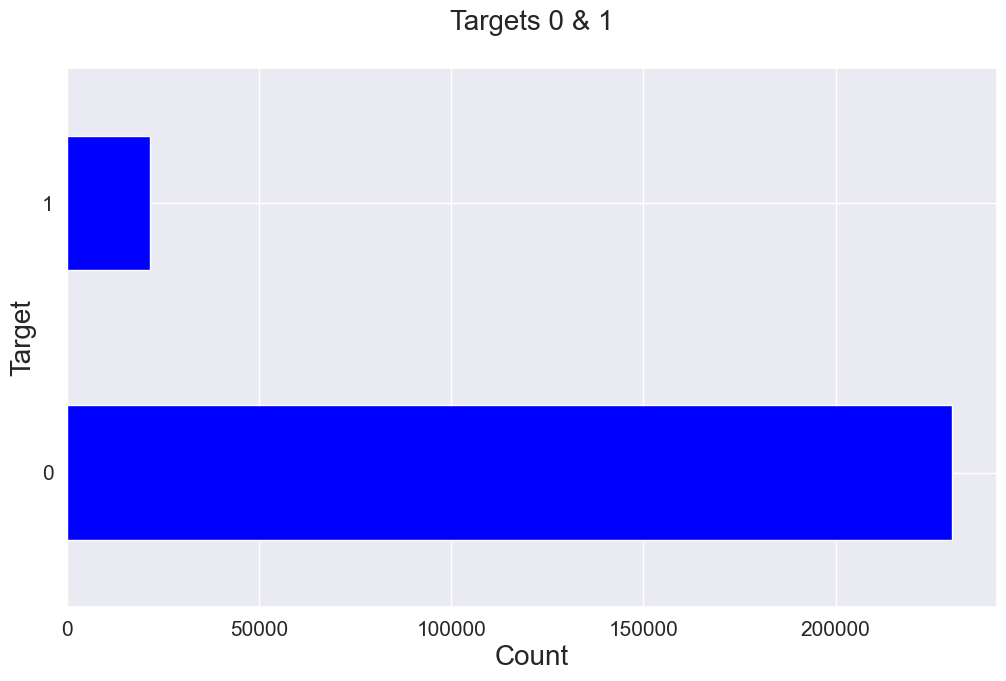

In [43]:
### Target Plotting
plt.figure(figsize = [12,7])
df_app.TARGET.value_counts().plot.barh(color = 'blue')

plt.title('Targets 0 & 1\n', fontsize = 20)
plt.xlabel('Count', fontsize = 20)
plt.ylabel('Target', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

In [44]:
### Check the imbalance ratio in Target column
target_0 = df_app.loc[df_app["TARGET"]==0]
target_1 = df_app.loc[df_app["TARGET"]==1]
round(len(target_0)/len(target_1), 2)

10.55

# Univariate Analysis

### Target = 0 people

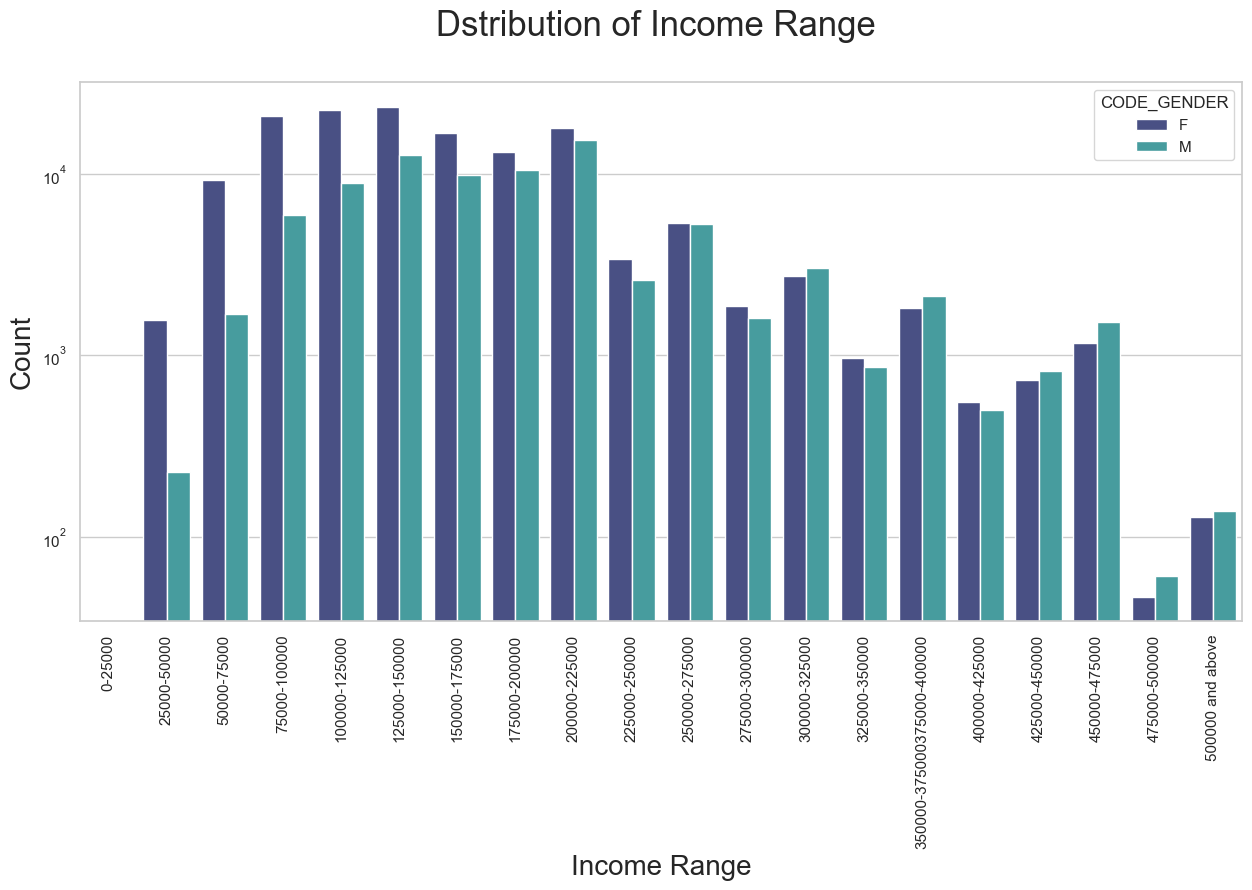

In [45]:
### Income range across various Gender
plt.figure(figsize = [15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_0, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette = 'mako')

plt.xticks(rotation = 90)
plt.title('Dstribution of Income Range \n', fontsize = 25)
plt.xlabel ('Income Range', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')

plt.show()

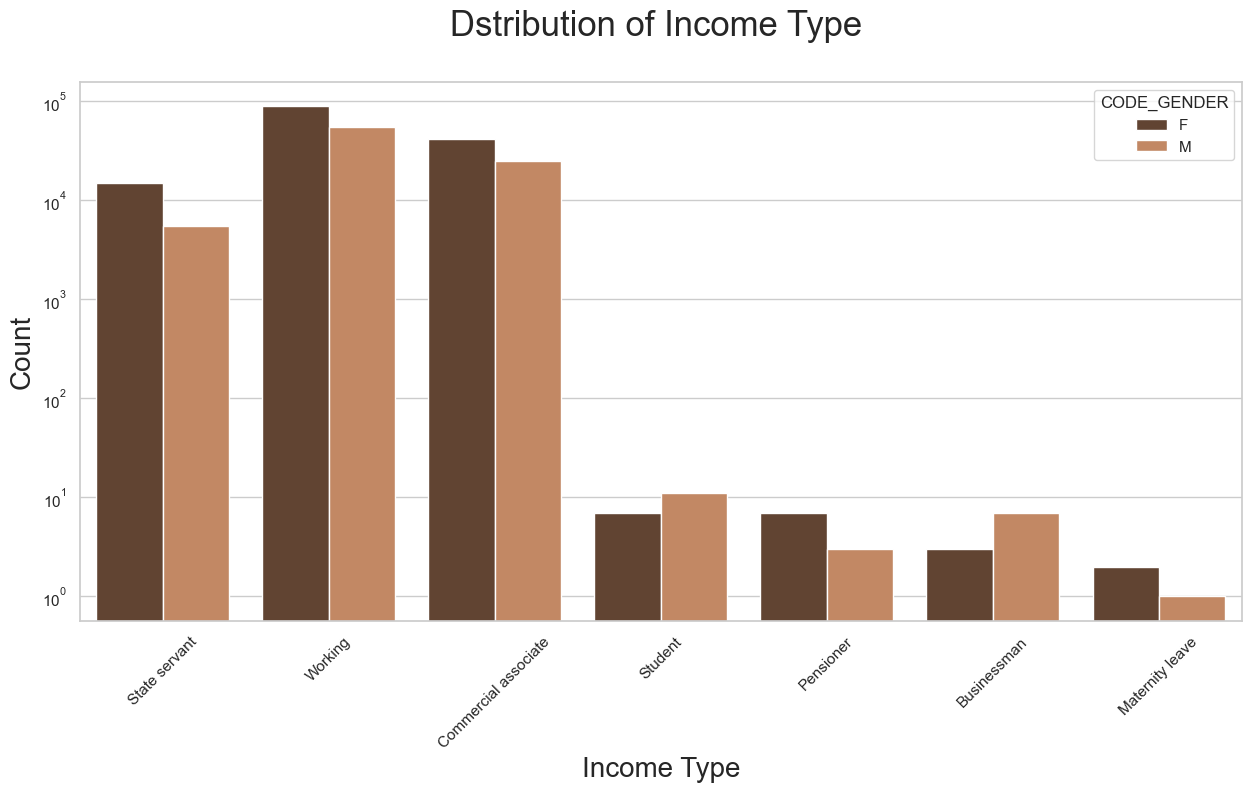

In [46]:
### Various income types from various Gender
plt.figure(figsize = [15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_0, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette = 'copper')

plt.xticks(rotation = 45)
plt.title('Dstribution of Income Type \n', fontsize = 25)
plt.xlabel ('Income Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')

plt.show()

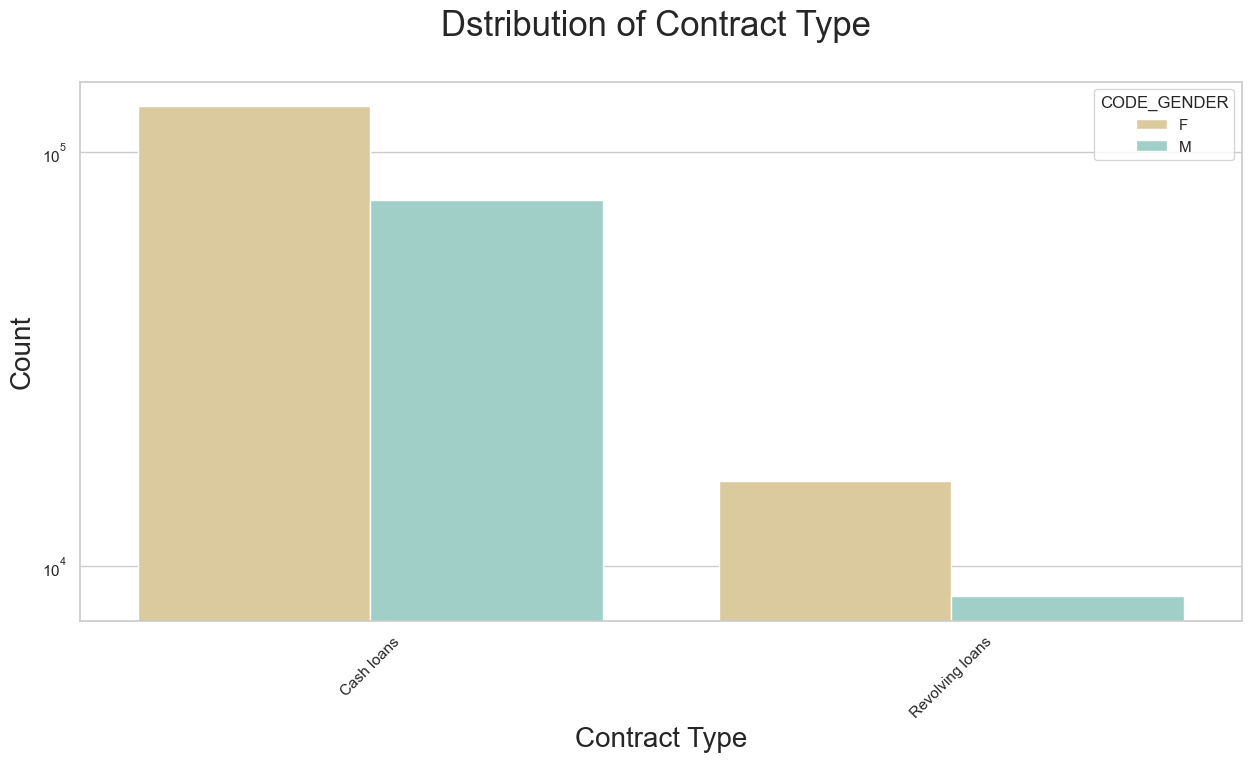

In [47]:
### Contract from various Gender
plt.figure(figsize = [15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_0, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette = 'BrBG')

plt.xticks(rotation = 45)
plt.title('Dstribution of Contract Type \n', fontsize = 25)
plt.xlabel ('Contract Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')

plt.show()

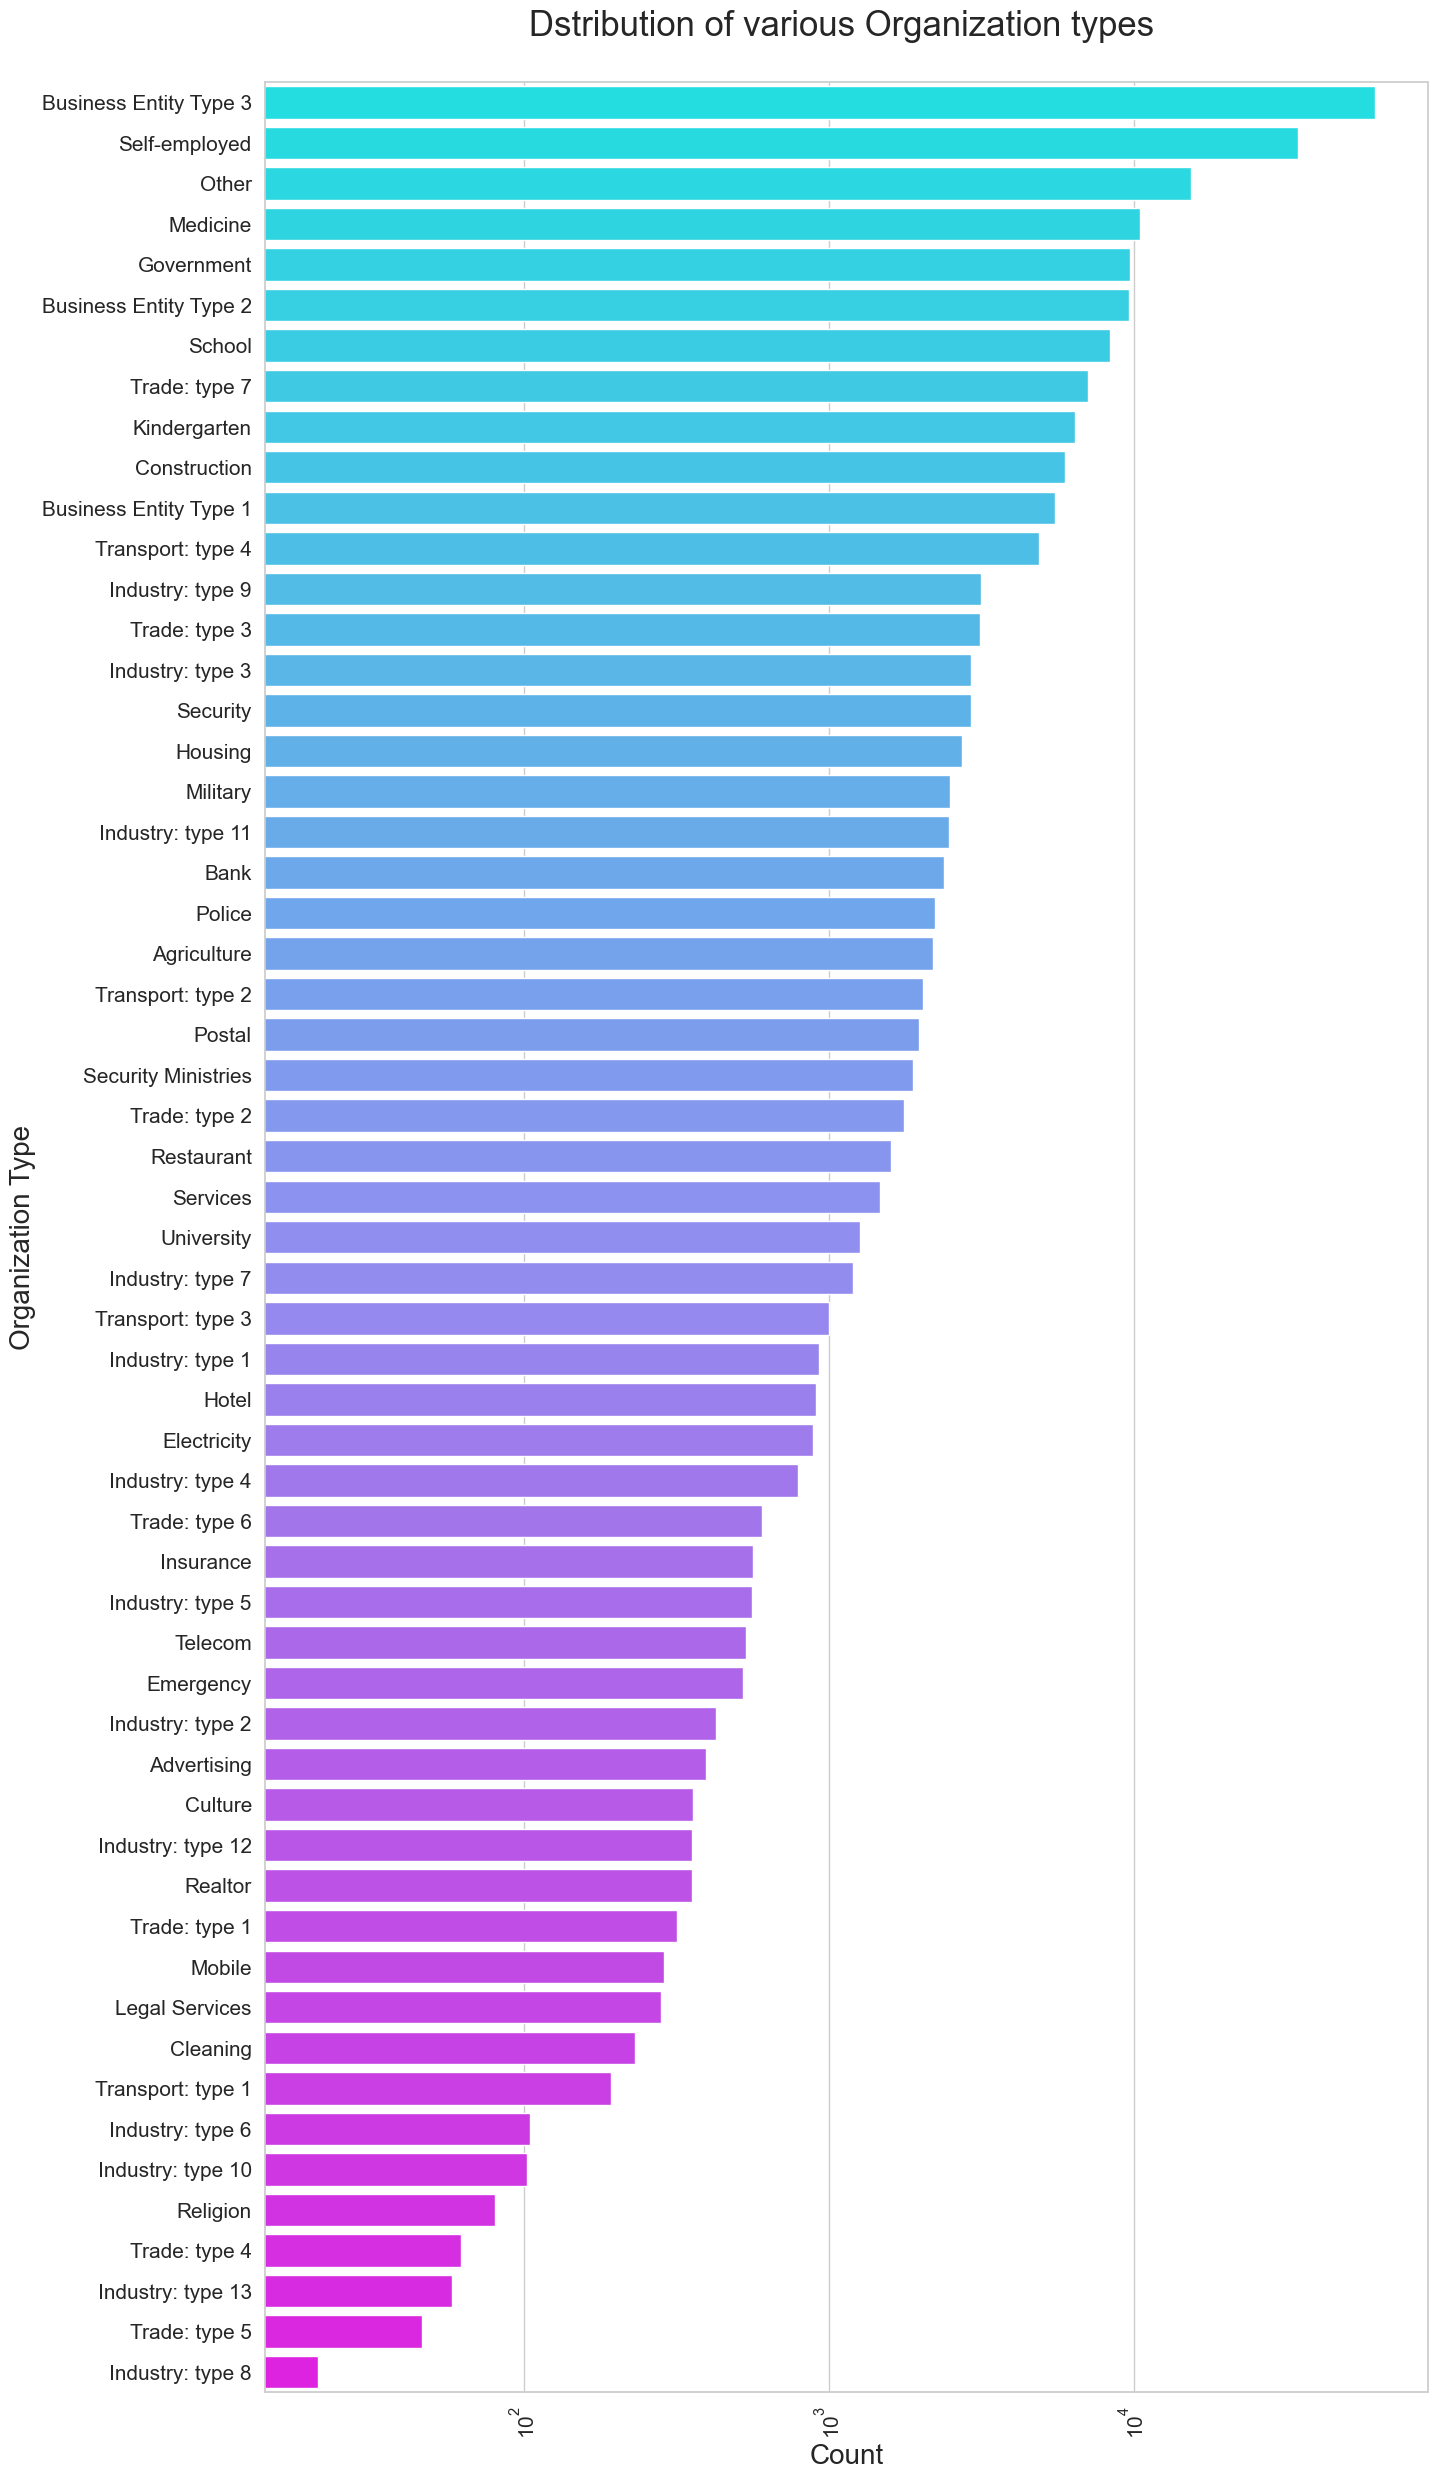

In [48]:
### Various Organization types
plt.figure(figsize = [15,30])
sns.countplot(data = target_0, y = 'ORGANIZATION_TYPE', order = target_0['ORGANIZATION_TYPE'].value_counts().index, palette='cool')

plt.title('Dstribution of various Organization types \n', fontsize = 25)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Organization Type', fontsize =20)
plt.show()

### Target = 1 people

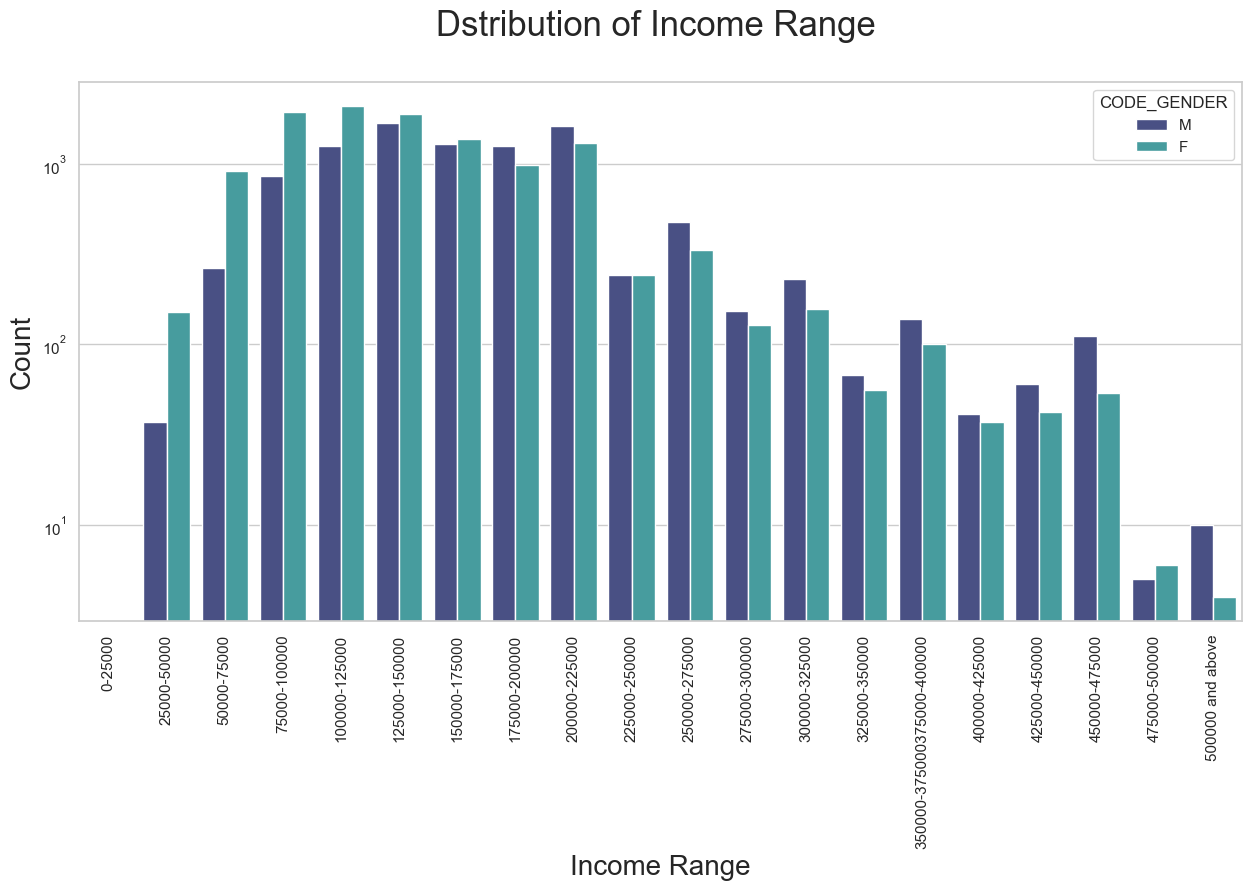

In [49]:
### Income range across various Gender
plt.figure(figsize = [15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_1, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette = 'mako')

plt.xticks(rotation = 90)
plt.title('Dstribution of Income Range \n', fontsize = 25)
plt.xlabel ('Income Range', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')

plt.show()

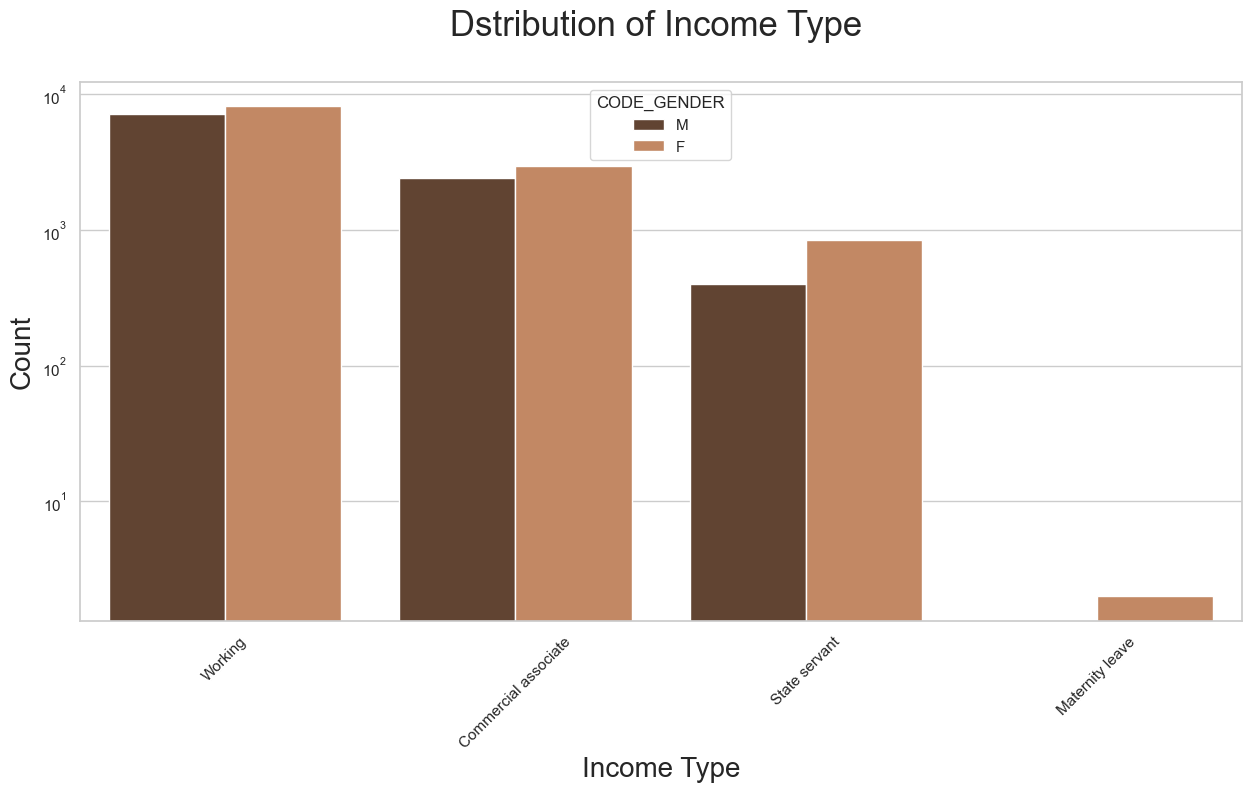

In [50]:
### Various income types from various Gender
plt.figure(figsize = [15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_1, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette = 'copper')

plt.xticks(rotation = 45)
plt.title('Dstribution of Income Type \n', fontsize = 25)
plt.xlabel ('Income Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')

plt.show()


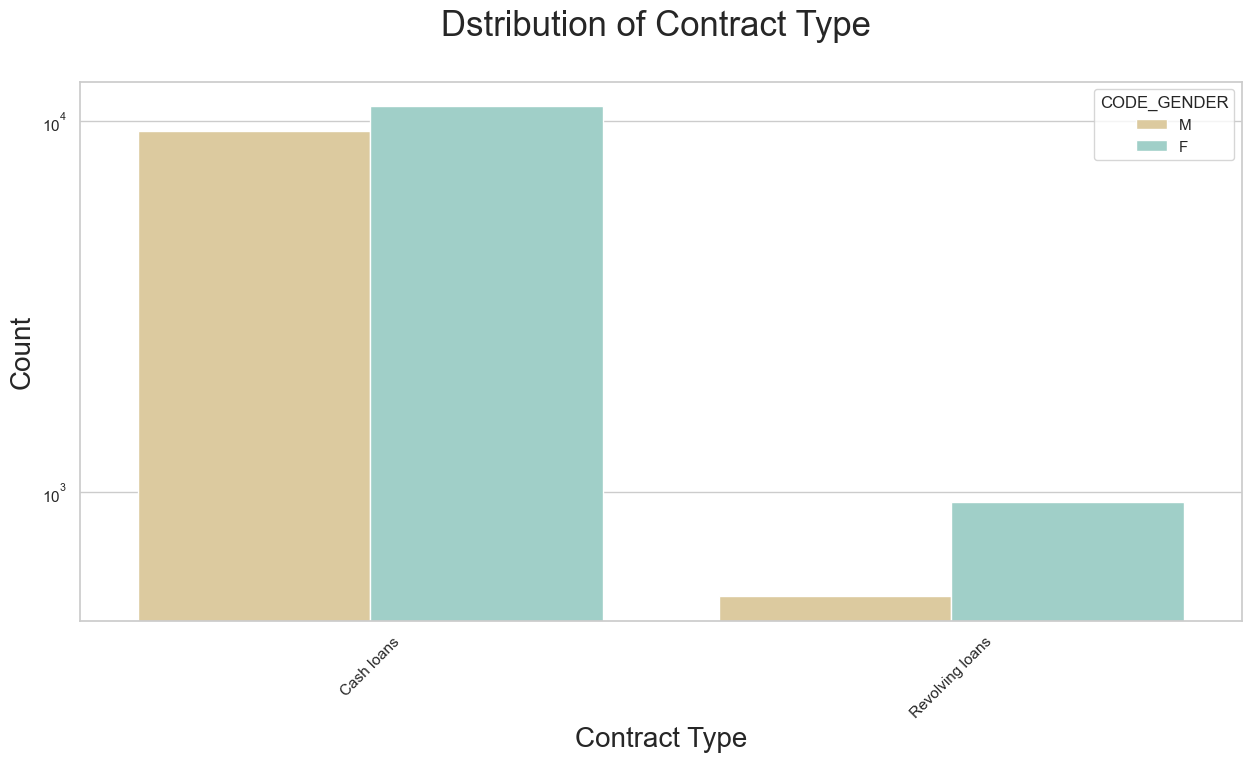

In [51]:
### Contract from various Gender
plt.figure(figsize = [15,7])
sns.set_style('whitegrid')
sns.countplot(data=target_1, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette = 'BrBG')

plt.xticks(rotation = 45)
plt.title('Dstribution of Contract Type \n', fontsize = 25)
plt.xlabel ('Contract Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')

plt.show()

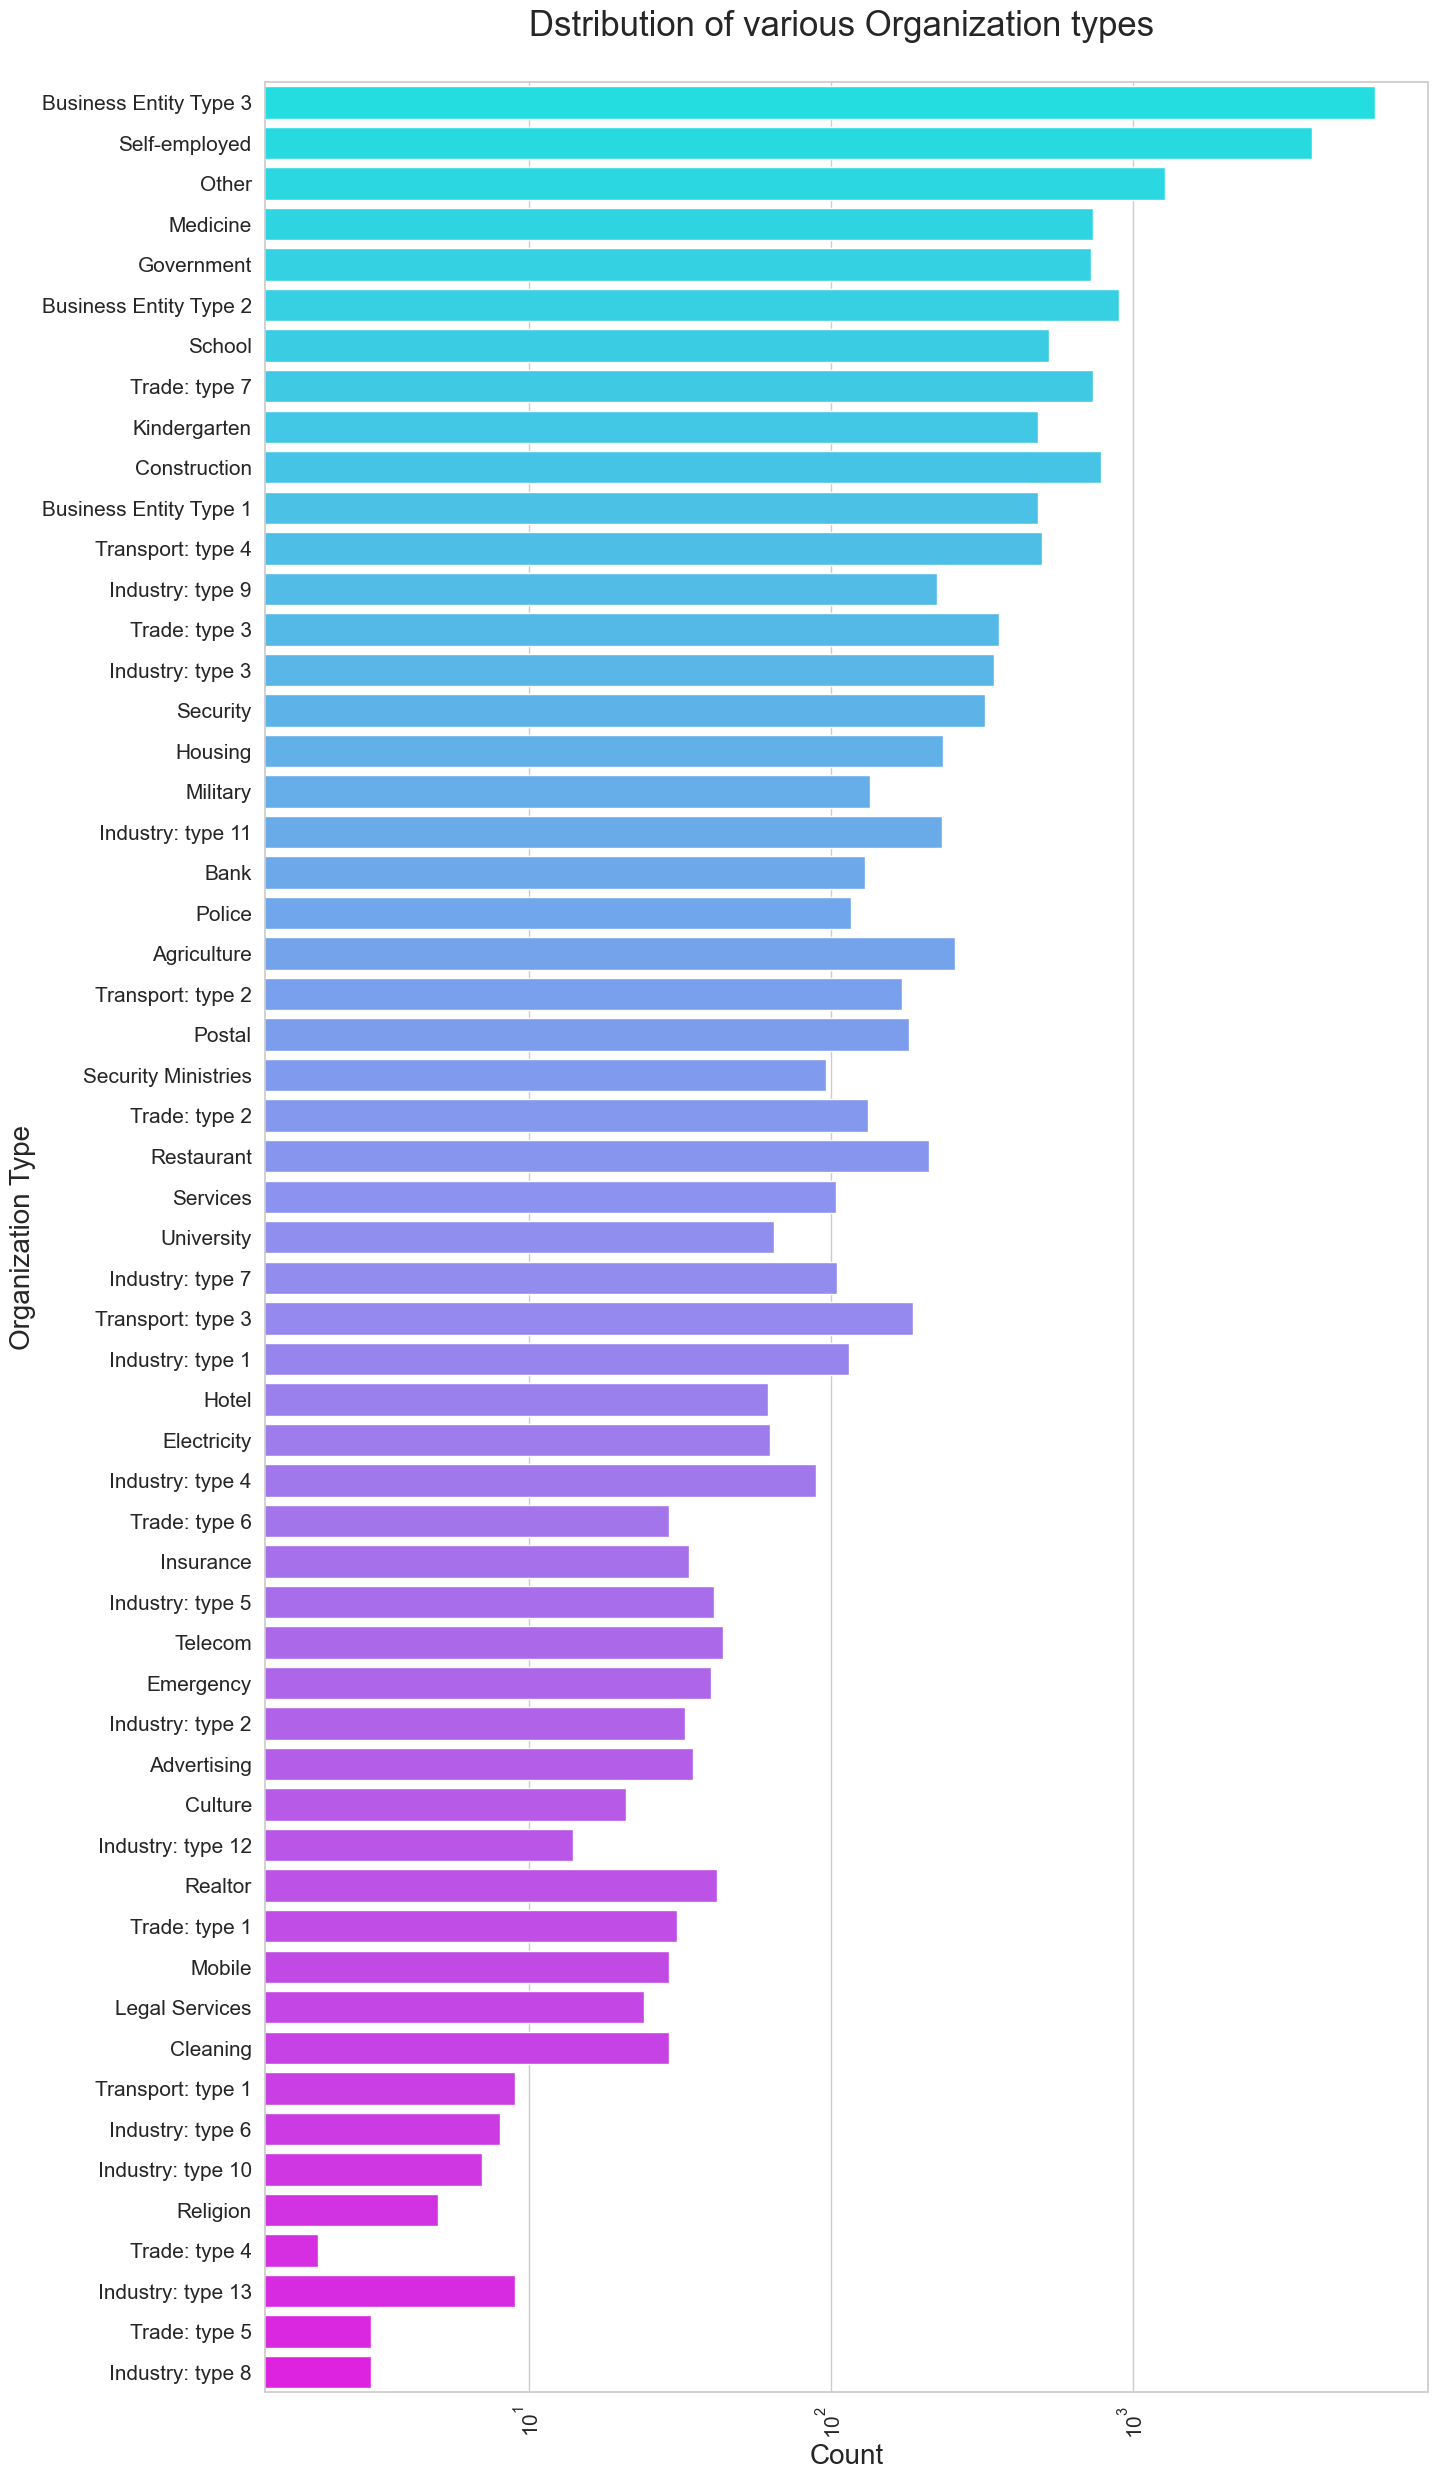

In [52]:
### Various Organization types
plt.figure(figsize = [15,30])
sns.countplot(data = target_1, y = 'ORGANIZATION_TYPE', order = target_0['ORGANIZATION_TYPE'].value_counts().index, palette='cool')

plt.title('Dstribution of various Organization types \n', fontsize = 25)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Organization Type', fontsize =20)
plt.show()

# Defining the Correlation

In [53]:
### Calculation of correlation among target_0 people
target_0_corr = target_0.iloc[0:, 2:].corr()
target_0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.009826,-0.018704,-0.007612,-0.022277,-0.030352,0.242462,0.063036,0.162900,-0.117746,0.893276,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414,-0.026134,-0.015157,0.019388,0.003419,0.019062,0.002384,-0.001019,0.000170,-0.001397,-0.021331,-0.003161,-0.032376
AMT_INCOME_TOTAL,-0.009826,1.000000,0.326155,0.400752,0.333217,0.169306,-0.045543,-0.030102,0.034508,-0.026462,-0.003133,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238,0.137752,-0.052724,-0.030661,-0.027914,-0.030477,-0.027415,0.002664,0.009130,0.006816,0.057193,0.012069,0.025002
AMT_CREDIT,-0.018704,0.326155,1.000000,0.762103,0.986315,0.103876,-0.152659,-0.087500,-0.015180,-0.034914,0.036760,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834,0.136033,0.056919,-0.003803,-0.022223,-0.003770,-0.024255,-0.002694,0.005392,-0.003026,0.052167,0.018479,-0.051741
AMT_ANNUITY,-0.007612,0.400752,0.762103,1.000000,0.766464,0.122206,-0.091571,-0.052470,0.009814,-0.025990,0.041231,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268,0.126979,0.046820,-0.016426,-0.023286,-0.016241,-0.024129,0.003876,0.003059,0.014125,0.034279,0.013746,-0.007369
AMT_GOODS_PRICE,-0.022277,0.333217,0.986315,0.766464,1.000000,0.106988,-0.146764,-0.088601,-0.011840,-0.036679,0.034889,0.049964,0.023522,0.052040,0.052319,-0.036935,-0.039240,-0.015803,0.142436,0.059199,-0.003960,-0.023445,-0.003970,-0.025066,-0.002259,0.005778,-0.002449,0.053942,0.018951,-0.054627
REGION_POPULATION_RELATIVE,-0.030352,0.169306,0.103876,0.122206,0.106988,1.000000,-0.041138,0.008663,-0.059696,-0.004014,-0.028813,0.174754,-0.003262,0.065822,0.092300,-0.053687,-0.049449,-0.017033,0.207116,-0.013429,-0.013763,0.005047,-0.013241,0.000658,-0.001447,0.002247,-0.003707,0.081801,-0.001901,-0.001975
DAYS_BIRTH,0.242462,-0.045543,-0.152659,-0.091571,-0.146764,-0.041138,1.000000,0.352662,0.299000,0.108050,0.178013,0.048619,0.058344,0.039298,0.014175,0.165505,0.112517,0.031121,-0.142263,-0.174321,0.019531,0.015212,0.019128,0.015897,-0.000236,0.002773,0.000385,-0.029297,-0.001681,-0.053976
DAYS_EMPLOYED,0.063036,-0.030102,-0.087500,-0.052470,-0.088601,0.008663,0.352662,1.000000,0.172102,0.086679,0.031523,0.022200,0.056714,0.082435,0.063205,0.112019,0.125791,0.074665,-0.081558,-0.121417,-0.000752,0.007447,-0.000811,0.009392,-0.003171,0.002559,0.002952,-0.023439,0.005958,-0.000783
DAYS_REGISTRATION,0.162900,0.034508,-0.015180,0.009814,-0.011840,-0.059696,0.299000,0.172102,1.000000,0.029895,0.155681,-0.031501,0.020549,0.017588,0.009254,0.047235,0.055274,0.031350,-0.071737,-0.089159,0.016317,0.007925,0.016130,0.008158,-0.002818,0.000769,-0.000395,-0.021499,0.002825,-0.019131
DAYS_ID_PUBLISH,-0.117746,-0.026462,-0.034914,-0.025990,-0.036679,-0.004014,0.108050,0.086679,0.029895,1.000000,-0.109789,0.005436,0.026744,0.020968,0.008941,0.053424,0.033071,0.001767,-0.059634,-0.100843,-0.008769,0.008669,-0.009280,0.010258,0.001470,-0.000731,-0.002902,-0.021363,-0.002721,-0.023105


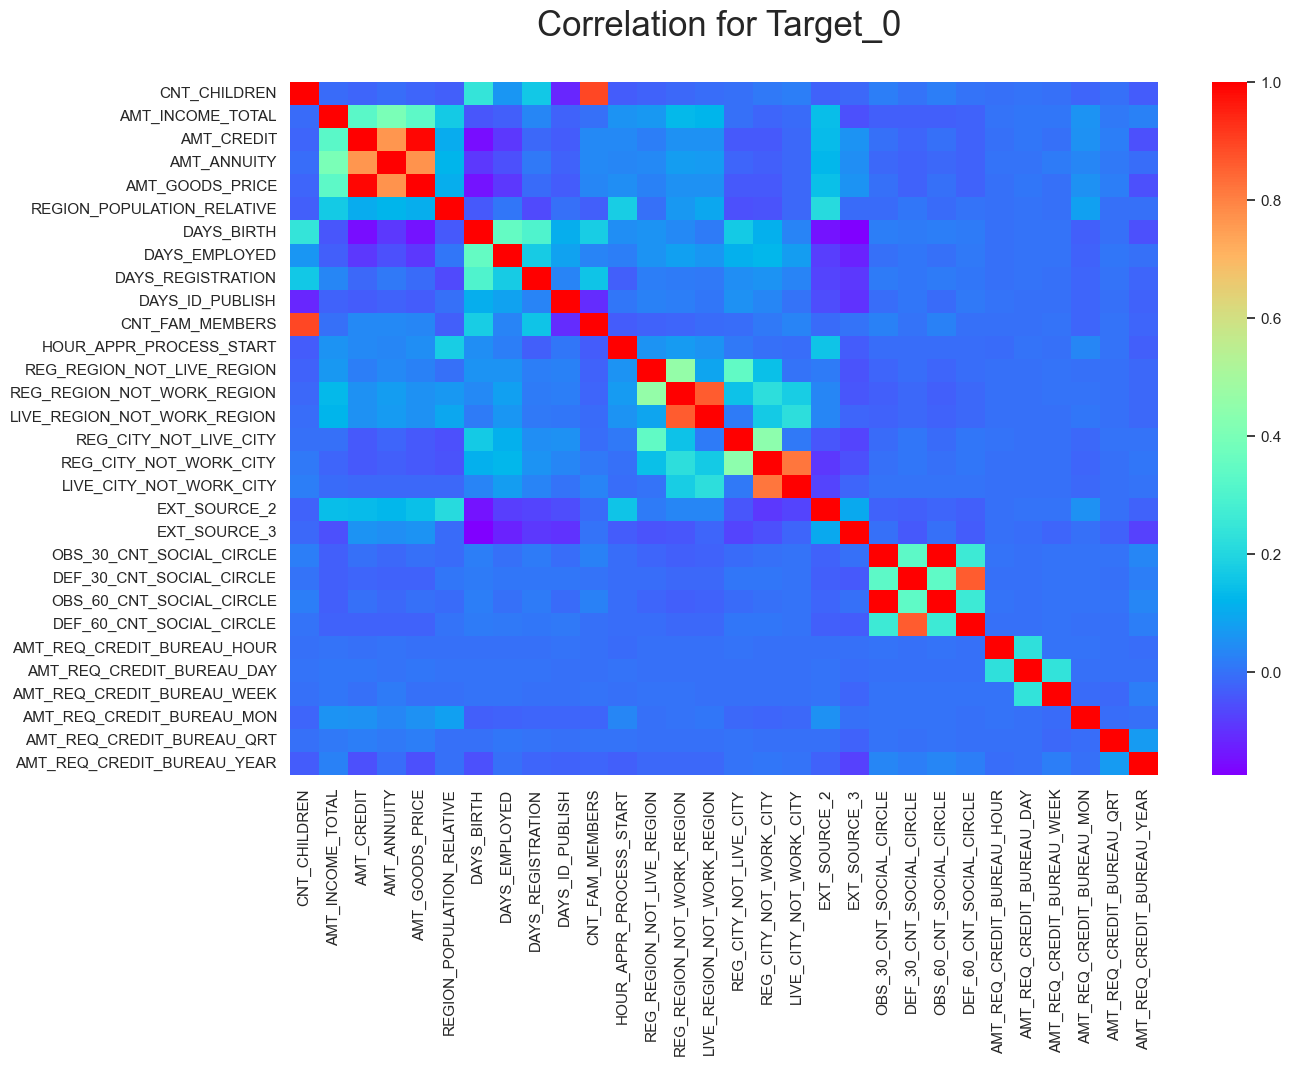

In [54]:
### Plotting the correlation for the Target_0
plt.figure(figsize =[14,9])
sns.heatmap(target_0_corr, annot=False, cmap='rainbow')
plt.title('Correlation for Target_0 \n', fontsize=25)
plt.show()

In [55]:
### Calculation of correlation among target_1 people
target_1_corr = target_1.iloc[0:, 2:].corr()
target_1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,-0.007707,-0.032019,0.176563,0.032627,0.126411,-0.089861,0.893829,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332,-0.010600,-0.000029,0.028712,0.002959,0.027955,-0.003220,-0.001269,-0.010219,-0.008425,-0.019714,-0.016997,-0.028892
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.036086,0.008476,-0.007822,-0.000039,-0.003959,-0.008858,0.003692,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401,0.006201,-0.013841,-0.005866,-0.005849,-0.005765,-0.005282,0.000925,-0.000456,-0.000003,0.003554,-0.001496,0.000634
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,0.982239,0.069220,-0.189512,-0.106003,-0.033250,-0.062405,0.045420,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875,0.126885,0.086877,0.015835,-0.031869,0.016319,-0.035170,-0.005051,-0.003064,0.009905,0.059205,-0.014755,-0.039210
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.748651,0.074406,-0.090497,-0.049032,0.014302,-0.044289,0.054884,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806,0.120642,0.052896,-0.000018,-0.024644,0.001216,-0.027918,0.010425,-0.002052,0.037405,0.055411,-0.005816,-0.010880
AMT_GOODS_PRICE,-0.007707,0.036086,0.982239,0.748651,1.000000,0.076210,-0.185486,-0.111906,-0.032067,-0.064666,0.042147,0.042280,0.023532,0.039387,0.038453,-0.035652,-0.041491,-0.017052,0.137716,0.087292,0.016710,-0.027045,0.017255,-0.029544,-0.004194,-0.001193,0.011933,0.063072,-0.013530,-0.042672
REGION_POPULATION_RELATIVE,-0.032019,0.008476,0.069220,0.074406,0.076210,1.000000,-0.049958,-0.015758,-0.055746,-0.011965,-0.030847,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017,0.170162,-0.013677,0.004513,0.023877,0.004907,0.015341,0.000885,-0.001767,0.006908,0.072552,-0.006391,-0.002406
DAYS_BIRTH,0.176563,-0.007822,-0.189512,-0.090497,-0.185486,-0.049958,1.000000,0.307018,0.241202,0.135519,0.110353,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044,-0.142909,-0.146276,-0.009064,0.011109,-0.009647,0.012546,0.010105,0.002459,0.003670,-0.027893,-0.010031,-0.082644
DAYS_EMPLOYED,0.032627,-0.000039,-0.106003,-0.049032,-0.111906,-0.015758,0.307018,1.000000,0.137454,0.096559,-0.001630,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026,-0.094249,-0.085475,-0.030834,0.000503,-0.030778,0.000288,0.007059,-0.006105,-0.008464,-0.022732,0.019980,-0.023115
DAYS_REGISTRATION,0.126411,-0.003959,-0.033250,0.014302,-0.032067,-0.055746,0.241202,0.137454,1.000000,0.049891,0.123583,-0.048209,0.010866,0.004578,0.000767,0.028759,0.049148,0.028976,-0.077788,-0.062070,0.014861,0.014170,0.015193,0.012064,-0.003311,0.000594,0.008072,0.000189,-0.008841,-0.015954
DAYS_ID_PUBLISH,-0.089861,-0.008858,-0.062405,-0.044289,-0.064666,-0.011965,0.135519,0.096559,0.049891,1.000000,-0.088621,0.008774,0.025320,0.013408,0.002667,0.047784,0.016251,-0.014871,-0.065811,-0.112960,-0.020269,0.012605,-0.020052,0.009585,0.000149,-0.013489,0.003504,-0.021452,0.012939,-0.039598


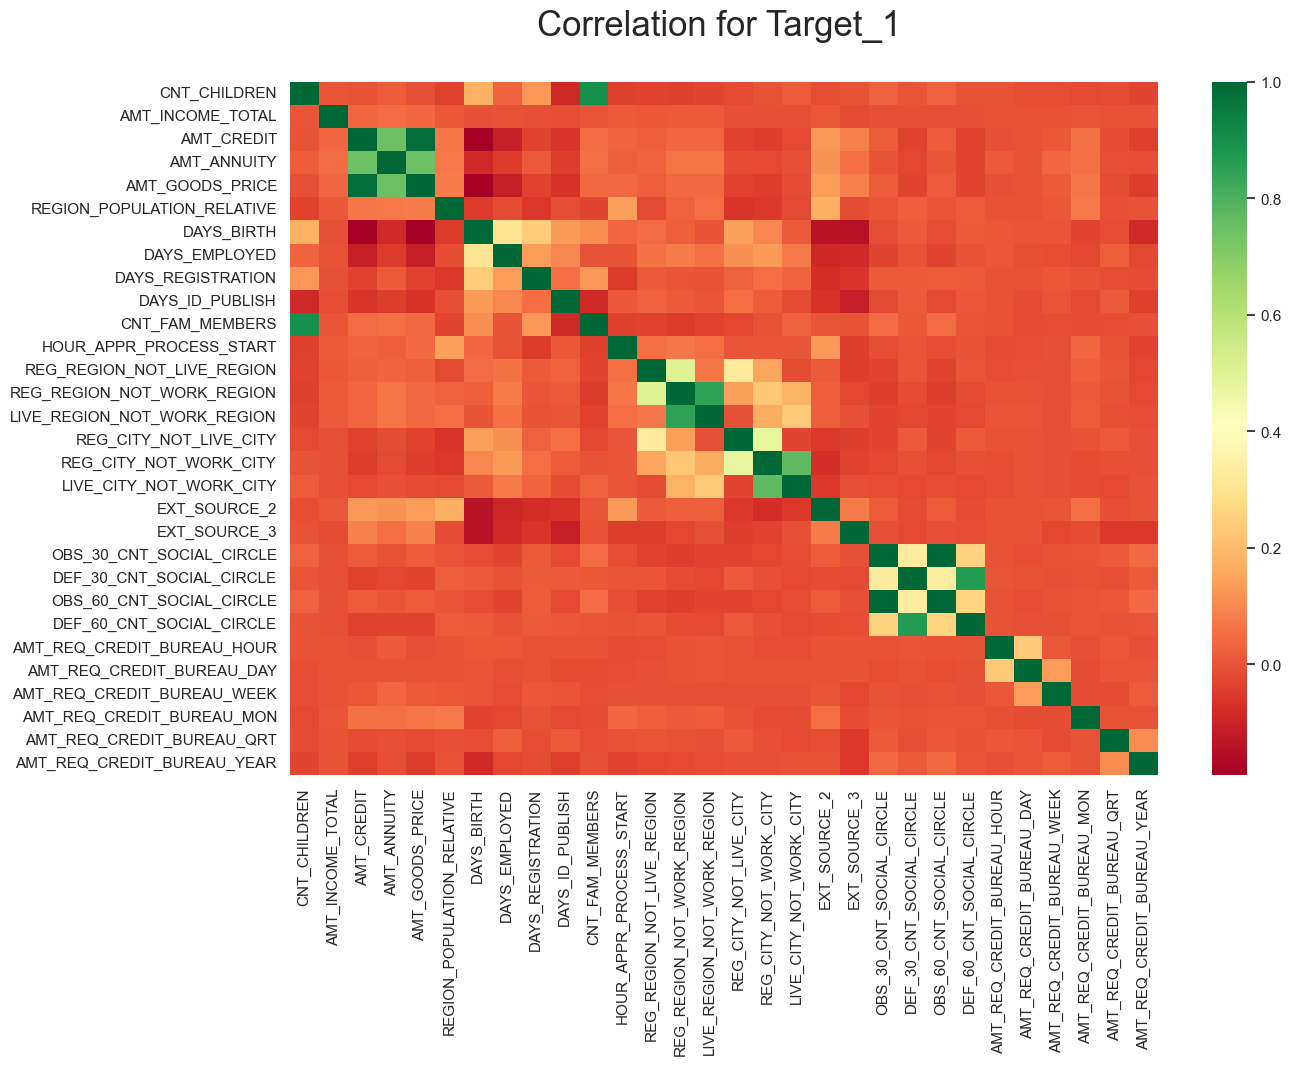

In [56]:
### Plotting the correlation for the Target_1
plt.figure(figsize =[14,9])
sns.heatmap(target_1_corr, annot=False, cmap='RdYlGn')
plt.title('Correlation for Target_1 \n', fontsize=25)
plt.show()

## Top 10 Correlations for Target_0 and Target_1

In [57]:
### Target_0
target_0_corr = target_0.iloc[0:, 2:].corr()
target_0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.009826,-0.018704,-0.007612,-0.022277,-0.030352,0.242462,0.063036,0.162900,-0.117746,0.893276,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414,-0.026134,-0.015157,0.019388,0.003419,0.019062,0.002384,-0.001019,0.000170,-0.001397,-0.021331,-0.003161,-0.032376
AMT_INCOME_TOTAL,-0.009826,1.000000,0.326155,0.400752,0.333217,0.169306,-0.045543,-0.030102,0.034508,-0.026462,-0.003133,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238,0.137752,-0.052724,-0.030661,-0.027914,-0.030477,-0.027415,0.002664,0.009130,0.006816,0.057193,0.012069,0.025002
AMT_CREDIT,-0.018704,0.326155,1.000000,0.762103,0.986315,0.103876,-0.152659,-0.087500,-0.015180,-0.034914,0.036760,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834,0.136033,0.056919,-0.003803,-0.022223,-0.003770,-0.024255,-0.002694,0.005392,-0.003026,0.052167,0.018479,-0.051741
AMT_ANNUITY,-0.007612,0.400752,0.762103,1.000000,0.766464,0.122206,-0.091571,-0.052470,0.009814,-0.025990,0.041231,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268,0.126979,0.046820,-0.016426,-0.023286,-0.016241,-0.024129,0.003876,0.003059,0.014125,0.034279,0.013746,-0.007369
AMT_GOODS_PRICE,-0.022277,0.333217,0.986315,0.766464,1.000000,0.106988,-0.146764,-0.088601,-0.011840,-0.036679,0.034889,0.049964,0.023522,0.052040,0.052319,-0.036935,-0.039240,-0.015803,0.142436,0.059199,-0.003960,-0.023445,-0.003970,-0.025066,-0.002259,0.005778,-0.002449,0.053942,0.018951,-0.054627
REGION_POPULATION_RELATIVE,-0.030352,0.169306,0.103876,0.122206,0.106988,1.000000,-0.041138,0.008663,-0.059696,-0.004014,-0.028813,0.174754,-0.003262,0.065822,0.092300,-0.053687,-0.049449,-0.017033,0.207116,-0.013429,-0.013763,0.005047,-0.013241,0.000658,-0.001447,0.002247,-0.003707,0.081801,-0.001901,-0.001975
DAYS_BIRTH,0.242462,-0.045543,-0.152659,-0.091571,-0.146764,-0.041138,1.000000,0.352662,0.299000,0.108050,0.178013,0.048619,0.058344,0.039298,0.014175,0.165505,0.112517,0.031121,-0.142263,-0.174321,0.019531,0.015212,0.019128,0.015897,-0.000236,0.002773,0.000385,-0.029297,-0.001681,-0.053976
DAYS_EMPLOYED,0.063036,-0.030102,-0.087500,-0.052470,-0.088601,0.008663,0.352662,1.000000,0.172102,0.086679,0.031523,0.022200,0.056714,0.082435,0.063205,0.112019,0.125791,0.074665,-0.081558,-0.121417,-0.000752,0.007447,-0.000811,0.009392,-0.003171,0.002559,0.002952,-0.023439,0.005958,-0.000783
DAYS_REGISTRATION,0.162900,0.034508,-0.015180,0.009814,-0.011840,-0.059696,0.299000,0.172102,1.000000,0.029895,0.155681,-0.031501,0.020549,0.017588,0.009254,0.047235,0.055274,0.031350,-0.071737,-0.089159,0.016317,0.007925,0.016130,0.008158,-0.002818,0.000769,-0.000395,-0.021499,0.002825,-0.019131
DAYS_ID_PUBLISH,-0.117746,-0.026462,-0.034914,-0.025990,-0.036679,-0.004014,0.108050,0.086679,0.029895,1.000000,-0.109789,0.005436,0.026744,0.020968,0.008941,0.053424,0.033071,0.001767,-0.059634,-0.100843,-0.008769,0.008669,-0.009280,0.010258,0.001470,-0.000731,-0.002902,-0.021363,-0.002721,-0.023105


In [58]:
### top 10 for target_0
target_0.tail(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
307498,456242,0,Cash loans,M,Y,Y,0,198000.0,1312110.0,52168.5,1125000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.072508,-19102,-3689,-746,-2650,2.0,MONDAY,10,0,0,0,0,0,0,Construction,0.746259,0.406617,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.0,175000-200000,NaN
307499,456243,0,Cash loans,F,N,Y,0,81000.0,225000.0,12694.5,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.007020,-16988,-8694,-5396,-509,2.0,TUESDAY,15,0,0,0,0,0,0,Medicine,0.649123,0.206779,4.0,0.0,4.0,0.0,0,0.0,0.0,1.0,1.0,0.0,75000-100000,200000-250000
307500,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.031329,-20390,-5326,-157,-3906,2.0,FRIDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.789389,0.337673,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,5.0,250000-275000,NaN
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009175,-12961,-1046,-1398,-3780,5.0,WEDNESDAY,14,0,0,0,0,0,0,Industry: type 1,0.575481,NaN,2.0,1.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,75000-100000,250000-300000
307502,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,-16063,-8736,-8672,-4531,3.0,MONDAY,16,0,0,0,0,1,1,School,0.313334,0.735221,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,75000-100000,200000-250000
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.022800,-11870,-399,-675,-3936,1.0,SATURDAY,11,0,0,0,0,0,0,Bank,0.501221,0.609276,9.0,3.0,9.0,2.0,0,0.0,0.0,1.0,0.0,2.0,100000-125000,300000-350000
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,-9798,-259,1.0,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,150000-175000,300000-350000
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456,-1982,1.0,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,150000-175000,250000-300000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737,-5150,1.0,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,1,0.0,0.0,1.0,0.0,1.0,150000-175000,650000-700000
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128,-410,2.0,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,0.0,1.0,150000-175000,650000-700000


In [59]:
### Target_1
target_1_corr = target_1.iloc[0:, 2:].corr()
target_1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,-0.007707,-0.032019,0.176563,0.032627,0.126411,-0.089861,0.893829,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332,-0.010600,-0.000029,0.028712,0.002959,0.027955,-0.003220,-0.001269,-0.010219,-0.008425,-0.019714,-0.016997,-0.028892
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.036086,0.008476,-0.007822,-0.000039,-0.003959,-0.008858,0.003692,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401,0.006201,-0.013841,-0.005866,-0.005849,-0.005765,-0.005282,0.000925,-0.000456,-0.000003,0.003554,-0.001496,0.000634
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,0.982239,0.069220,-0.189512,-0.106003,-0.033250,-0.062405,0.045420,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875,0.126885,0.086877,0.015835,-0.031869,0.016319,-0.035170,-0.005051,-0.003064,0.009905,0.059205,-0.014755,-0.039210
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.748651,0.074406,-0.090497,-0.049032,0.014302,-0.044289,0.054884,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806,0.120642,0.052896,-0.000018,-0.024644,0.001216,-0.027918,0.010425,-0.002052,0.037405,0.055411,-0.005816,-0.010880
AMT_GOODS_PRICE,-0.007707,0.036086,0.982239,0.748651,1.000000,0.076210,-0.185486,-0.111906,-0.032067,-0.064666,0.042147,0.042280,0.023532,0.039387,0.038453,-0.035652,-0.041491,-0.017052,0.137716,0.087292,0.016710,-0.027045,0.017255,-0.029544,-0.004194,-0.001193,0.011933,0.063072,-0.013530,-0.042672
REGION_POPULATION_RELATIVE,-0.032019,0.008476,0.069220,0.074406,0.076210,1.000000,-0.049958,-0.015758,-0.055746,-0.011965,-0.030847,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017,0.170162,-0.013677,0.004513,0.023877,0.004907,0.015341,0.000885,-0.001767,0.006908,0.072552,-0.006391,-0.002406
DAYS_BIRTH,0.176563,-0.007822,-0.189512,-0.090497,-0.185486,-0.049958,1.000000,0.307018,0.241202,0.135519,0.110353,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044,-0.142909,-0.146276,-0.009064,0.011109,-0.009647,0.012546,0.010105,0.002459,0.003670,-0.027893,-0.010031,-0.082644
DAYS_EMPLOYED,0.032627,-0.000039,-0.106003,-0.049032,-0.111906,-0.015758,0.307018,1.000000,0.137454,0.096559,-0.001630,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026,-0.094249,-0.085475,-0.030834,0.000503,-0.030778,0.000288,0.007059,-0.006105,-0.008464,-0.022732,0.019980,-0.023115
DAYS_REGISTRATION,0.126411,-0.003959,-0.033250,0.014302,-0.032067,-0.055746,0.241202,0.137454,1.000000,0.049891,0.123583,-0.048209,0.010866,0.004578,0.000767,0.028759,0.049148,0.028976,-0.077788,-0.062070,0.014861,0.014170,0.015193,0.012064,-0.003311,0.000594,0.008072,0.000189,-0.008841,-0.015954
DAYS_ID_PUBLISH,-0.089861,-0.008858,-0.062405,-0.044289,-0.064666,-0.011965,0.135519,0.096559,0.049891,1.000000,-0.088621,0.008774,0.025320,0.013408,0.002667,0.047784,0.016251,-0.014871,-0.065811,-0.112960,-0.020269,0.012605,-0.020052,0.009585,0.000149,-0.013489,0.003504,-0.021452,0.012939,-0.039598


In [60]:
### top 10 for target_1
target_1.tail(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
307383,456108,1,Cash loans,F,N,Y,1,135000.0,457834.5,33444.0,378000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-12460,-1887,-4771,-1915,3.0,TUESDAY,8,0,0,0,0,0,0,Self-employed,0.146779,0.133429,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.0,125000-150000,450000-500000
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,643500.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.018850,-11407,-1641,-9288,-2923,3.0,MONDAY,18,0,0,0,0,0,0,Self-employed,0.696695,0.624615,3.0,2.0,3.0,1.0,0,0.0,0.0,1.0,0.0,1.0,250000-275000,700000-750000
307410,456143,1,Cash loans,F,N,Y,0,85500.0,180000.0,8059.5,180000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.010966,-15520,-1592,-6253,-4306,1.0,FRIDAY,13,0,0,0,0,0,0,Other,0.003404,0.286652,3.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,2.0,75000-100000,150000-200000
307438,456176,1,Cash loans,M,N,Y,0,171000.0,1436850.0,42142.5,1125000.0,Unaccompanied,State servant,Incomplete higher,Single / not married,House / apartment,0.032561,-11275,-3085,-11275,-3941,1.0,TUESDAY,16,0,0,0,0,0,0,Other,0.727863,0.392774,5.0,1.0,5.0,0.0,0,0.0,0.0,0.0,1.0,2.0,150000-175000,NaN
307446,456184,1,Cash loans,M,N,N,0,270000.0,900000.0,40671.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010006,-10130,-1290,-1862,-2772,1.0,FRIDAY,14,0,0,0,0,0,0,Construction,0.348737,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,250000-275000,850000-900000
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,-9918,-3048,-8507,-2580,3.0,MONDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.329708,0.360613,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.0,200000-225000,400000-450000
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.007330,-13416,-2405,-500,-4704,3.0,THURSDAY,13,0,0,0,0,0,0,Construction,0.583214,0.424130,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,6.0,125000-150000,NaN
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,297000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.008575,-20644,-3147,-8921,-3832,2.0,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.713524,0.511892,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.0,200000-225000,250000-300000
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.014464,-16471,-286,-8291,-9,2.0,FRIDAY,5,0,0,0,0,0,0,Business Entity Type 3,0.615261,0.397946,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0,1.0,2.0,200000-225000,500000-550000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562,-931,2.0,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.514163,0.661024,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,150000-175000,350000-400000


In [61]:
### Converting negative values to positive and sort
corr_1 = target_1_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_1 = corr_1[corr_1 != 1.0]
corr_1

AMT_REQ_CREDIT_BUREAU_WEEK   AMT_INCOME_TOTAL               0.000003
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_WEEK     0.000003
AMT_ANNUITY                  OBS_30_CNT_SOCIAL_CIRCLE       0.000018
OBS_30_CNT_SOCIAL_CIRCLE     AMT_ANNUITY                    0.000018
EXT_SOURCE_3                 CNT_CHILDREN                   0.000029
CNT_CHILDREN                 EXT_SOURCE_3                   0.000029
AMT_INCOME_TOTAL             DAYS_EMPLOYED                  0.000039
DAYS_EMPLOYED                AMT_INCOME_TOTAL               0.000039
                             HOUR_APPR_PROCESS_START        0.000092
HOUR_APPR_PROCESS_START      DAYS_EMPLOYED                  0.000092
REG_REGION_NOT_WORK_REGION   AMT_REQ_CREDIT_BUREAU_DAY      0.000096
AMT_REQ_CREDIT_BUREAU_DAY    REG_REGION_NOT_WORK_REGION     0.000096
AMT_REQ_CREDIT_BUREAU_HOUR   EXT_SOURCE_2                   0.000129
EXT_SOURCE_2                 AMT_REQ_CREDIT_BUREAU_HOUR     0.000129
AMT_REQ_CREDIT_BUREAU_HOUR   DAYS_

In [62]:
corr_1.tail(10)

LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.846872
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.846872
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867963
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.867963
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893829
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893829
AMT_GOODS_PRICE              AMT_CREDIT                     0.982239
AMT_CREDIT                   AMT_GOODS_PRICE                0.982239
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998288
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998288
dtype: float64

## Bivariate Analysis of Numerical columns

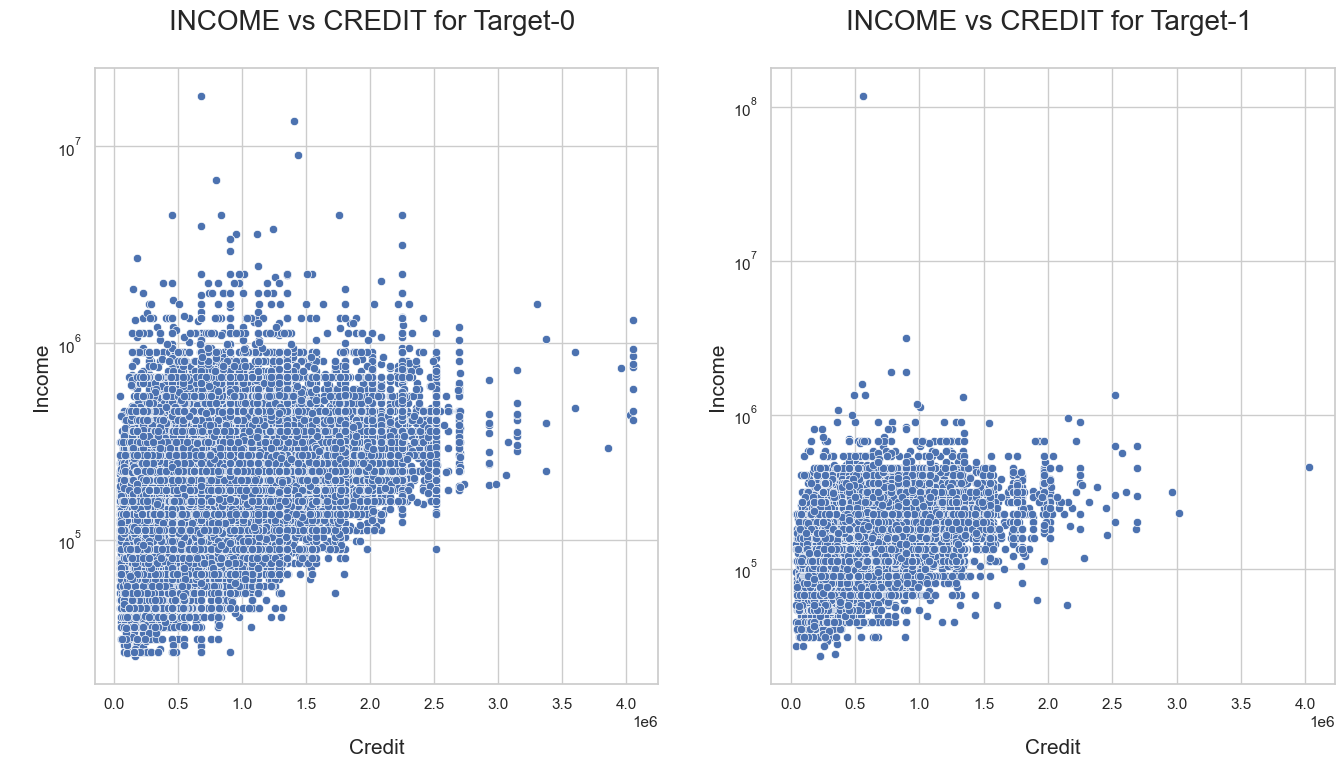

In [63]:
### plotting Scatterplot
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(target_0.AMT_CREDIT, target_0.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-0 \n',  fontsize = 20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize = 15)
plt.ylabel('\nIncome', fontsize = 15)

plt.subplot(1,2,2)
sns.scatterplot(target_1.AMT_CREDIT, target_1.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-1 \n', fontsize = 20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize = 15)
plt.ylabel('\nIncome', fontsize = 15)

plt.show()

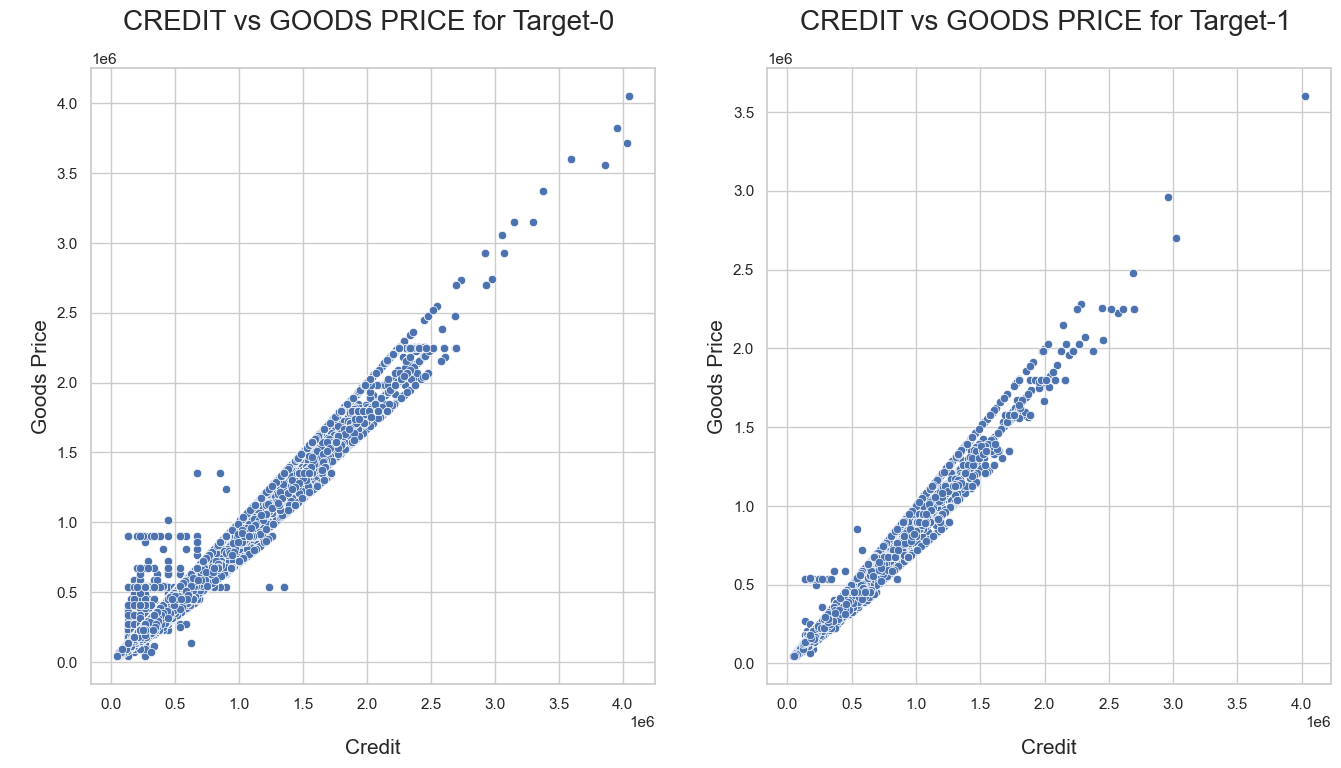

In [64]:
### Plotting Scatterplot to find any correlation and check the trends in the dataset
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x ='AMT_CREDIT', y ='AMT_GOODS_PRICE',data = target_0)
plt.title('CREDIT vs GOODS PRICE for Target-0 \n', fontsize = 20)
plt.xlabel('\nCredit', fontsize = 15)
plt.ylabel('\nGoods Price', fontsize = 15)

plt.subplot(1,2,2)
sns.scatterplot(x ='AMT_CREDIT', y ='AMT_GOODS_PRICE',data = target_1)
plt.title('CREDIT vs GOODS PRICE for Target-1 \n', fontsize = 20)
plt.xlabel('\nCredit', fontsize = 15)
plt.ylabel('\nGoods Price', fontsize = 15)

plt.show()

## Finding Outliers

### Univariate Analysis

#### Target_0

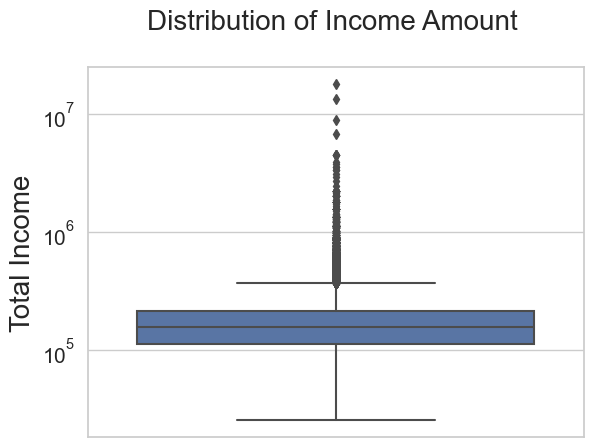

In [65]:
### Distribution of Income
sns.set_style('whitegrid')

sns.boxplot(data= target_0, y = 'AMT_INCOME_TOTAL')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize = 20)
plt.title('Distribution of Income Amount \n', fontsize =20)
plt.yscale('log')

plt.show()

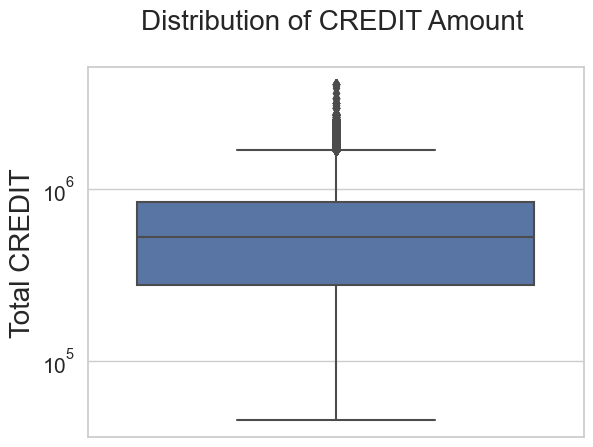

In [66]:
### Distribution of Credit
sns.set_style('whitegrid')

sns.boxplot(data= target_0, y = 'AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total CREDIT', fontsize = 20)
plt.title('Distribution of CREDIT Amount \n', fontsize =20)

plt.show()

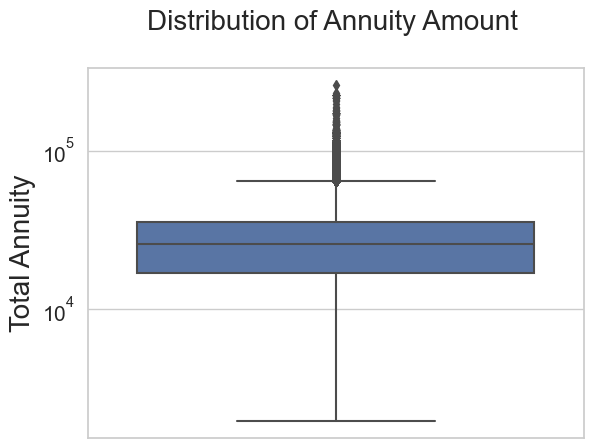

In [67]:
### Distribution of Annuity 
sns.set_style('whitegrid')

sns.boxplot(data= target_0, y = 'AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize = 20)
plt.title('Distribution of Annuity Amount \n', fontsize =20)

plt.show()

#### Target_1

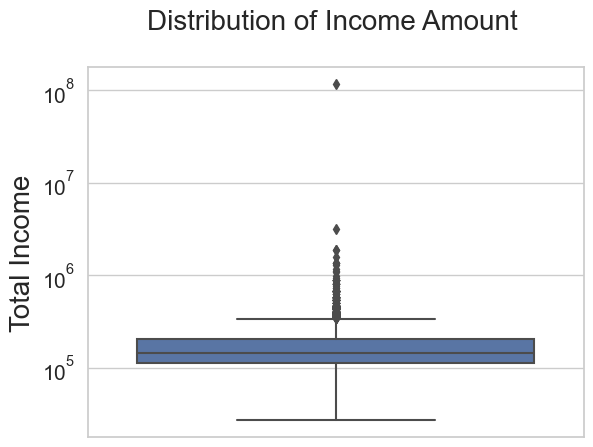

In [68]:
### Distribution of Income
sns.set_style('whitegrid')

sns.boxplot(data= target_1, y = 'AMT_INCOME_TOTAL')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize = 20)
plt.title('Distribution of Income Amount \n', fontsize =20)
plt.yscale('log')

plt.show()

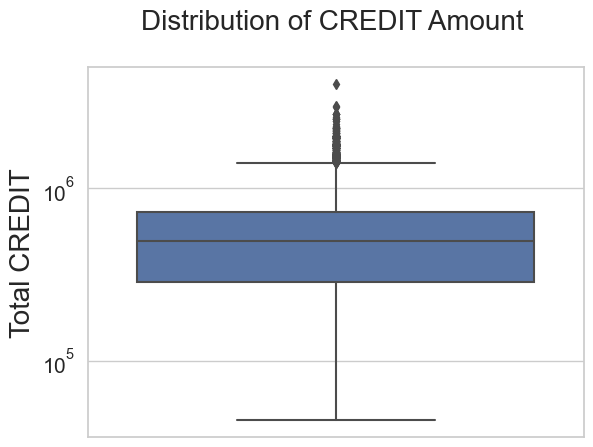

In [69]:
### Distribution of Credit
sns.set_style('whitegrid')

sns.boxplot(data= target_1, y = 'AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total CREDIT', fontsize = 20)
plt.title('Distribution of CREDIT Amount \n', fontsize =20)

plt.show()

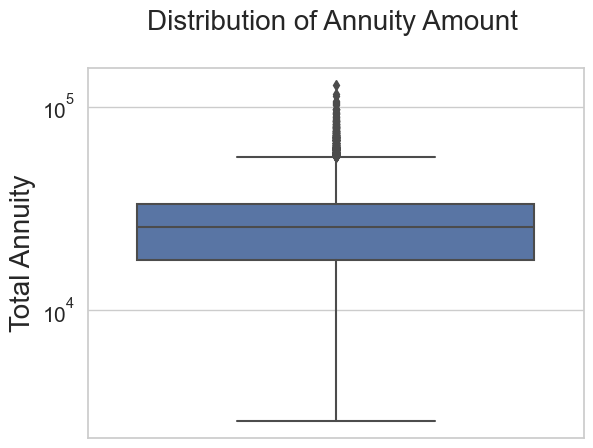

In [70]:
### Distribution of Annuity 
sns.set_style('whitegrid')

sns.boxplot(data= target_1, y = 'AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize = 20)
plt.title('Distribution of Annuity Amount \n', fontsize =20)

plt.show()

### Multivariate Analysis

#### Target_0

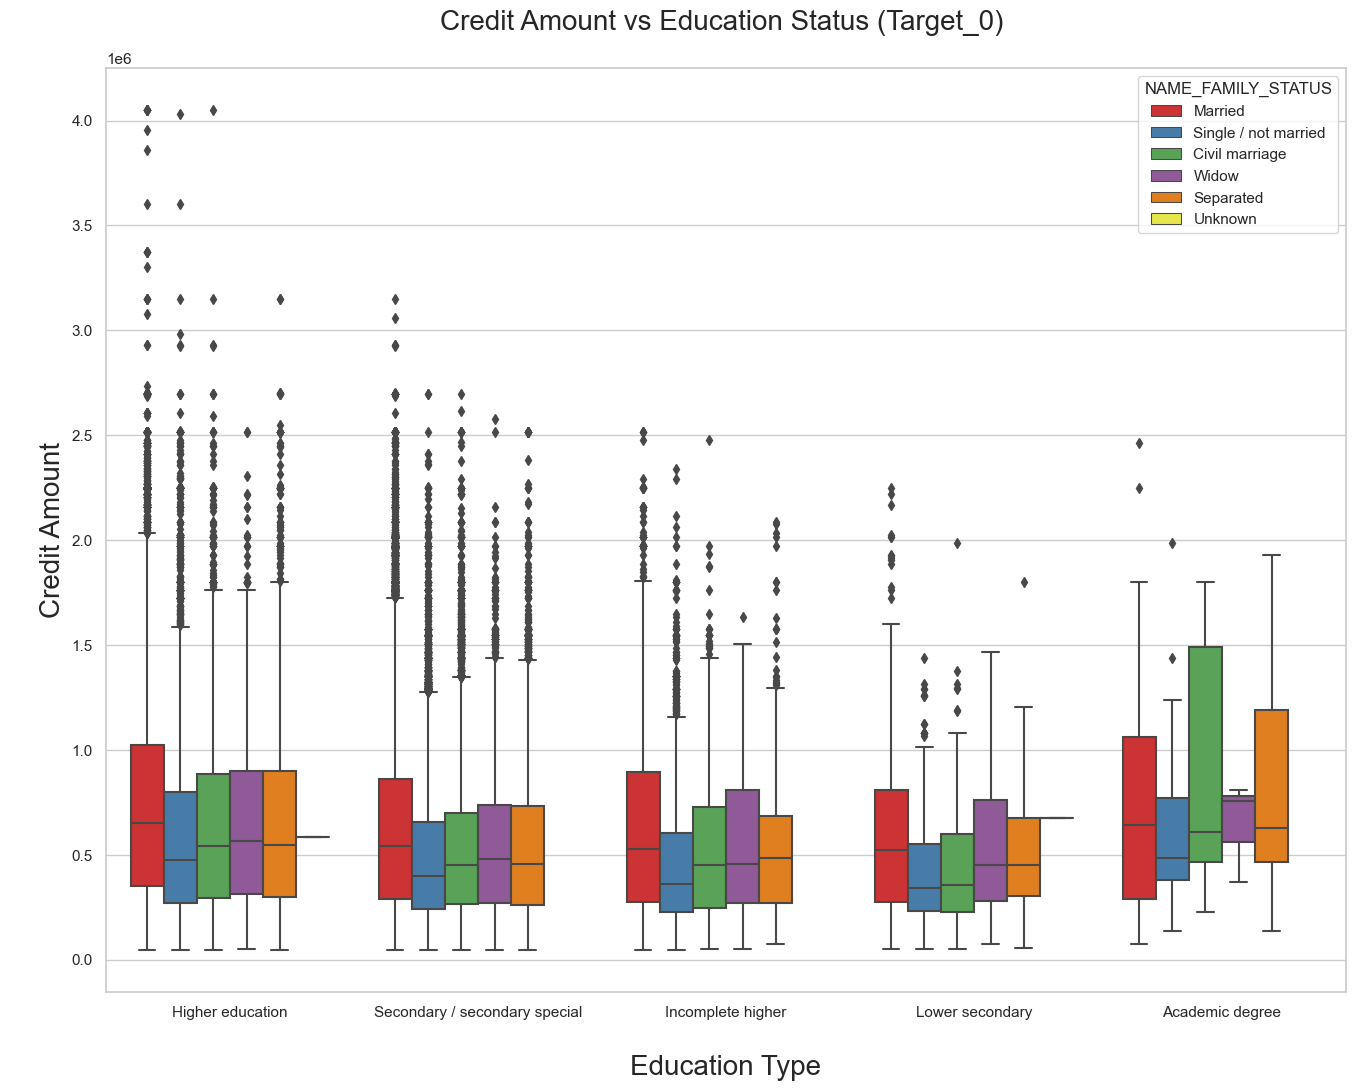

In [71]:
### Box plot for Target_0 of Credit Amount
plt.figure(figsize = [16,12])

sns.boxplot(data= target_0, x= 'NAME_EDUCATION_TYPE', y= 'AMT_CREDIT', hue='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('\nCredit Amount', fontsize=20)
plt.title('Credit Amount vs Education Status (Target_0) \n', fontsize =20)
plt.show()

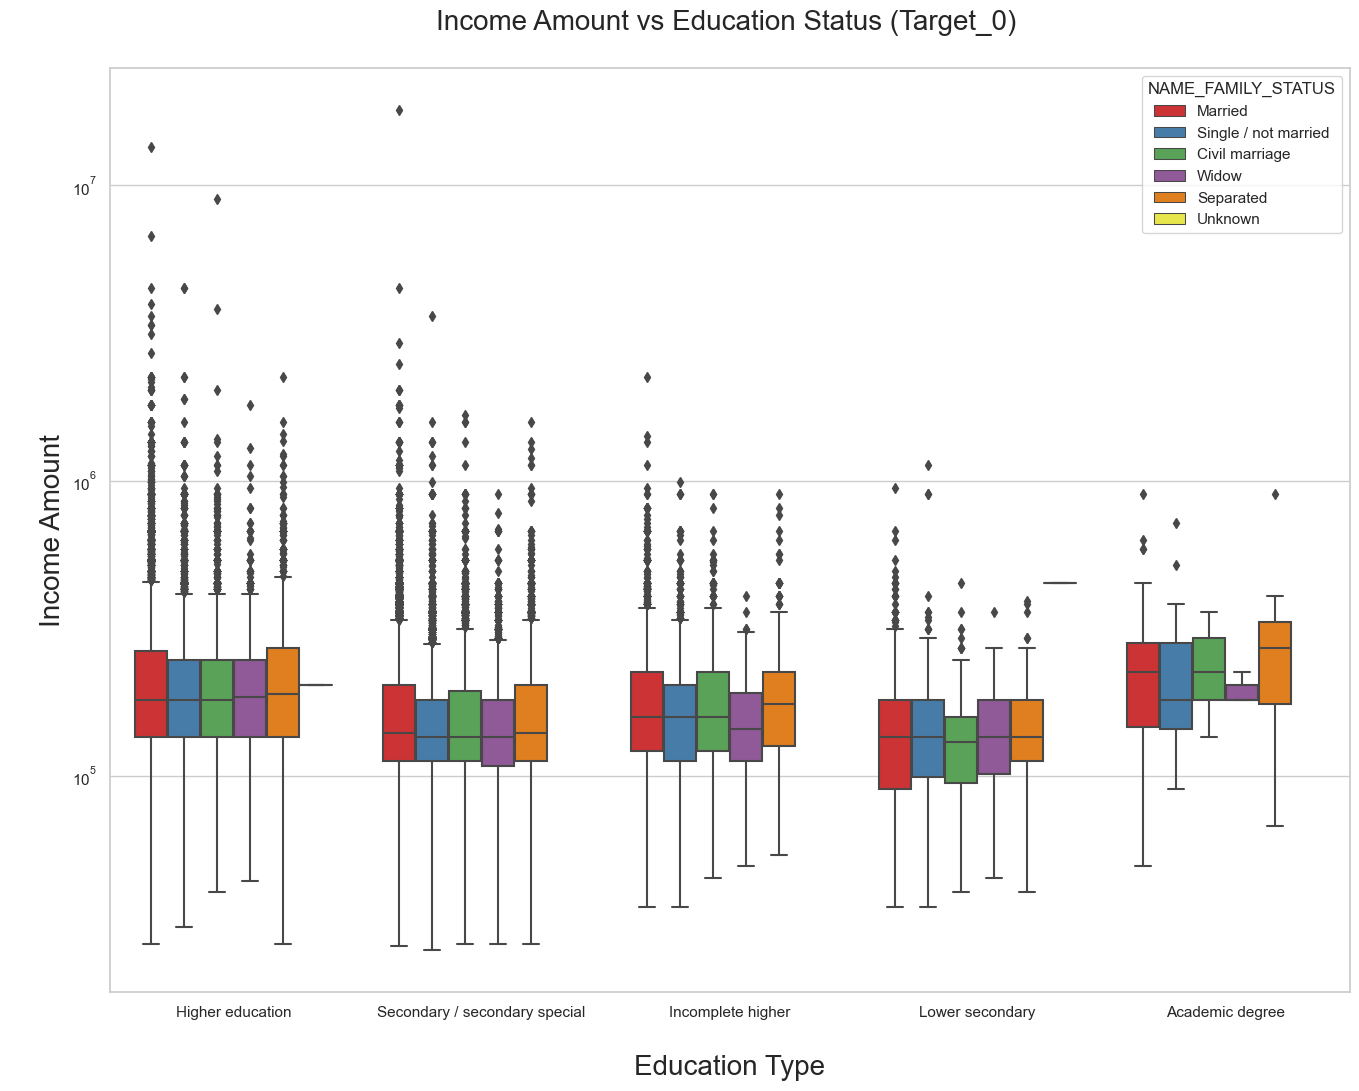

In [72]:
### Box plot for Target_0 of Income Amount
plt.figure(figsize = [16,12])

sns.boxplot(data= target_0, x= 'NAME_EDUCATION_TYPE', y= 'AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.yscale('log')
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('\nIncome Amount', fontsize=20)
plt.title('Income Amount vs Education Status (Target_0) \n', fontsize =20)
plt.show()

#### Target_1

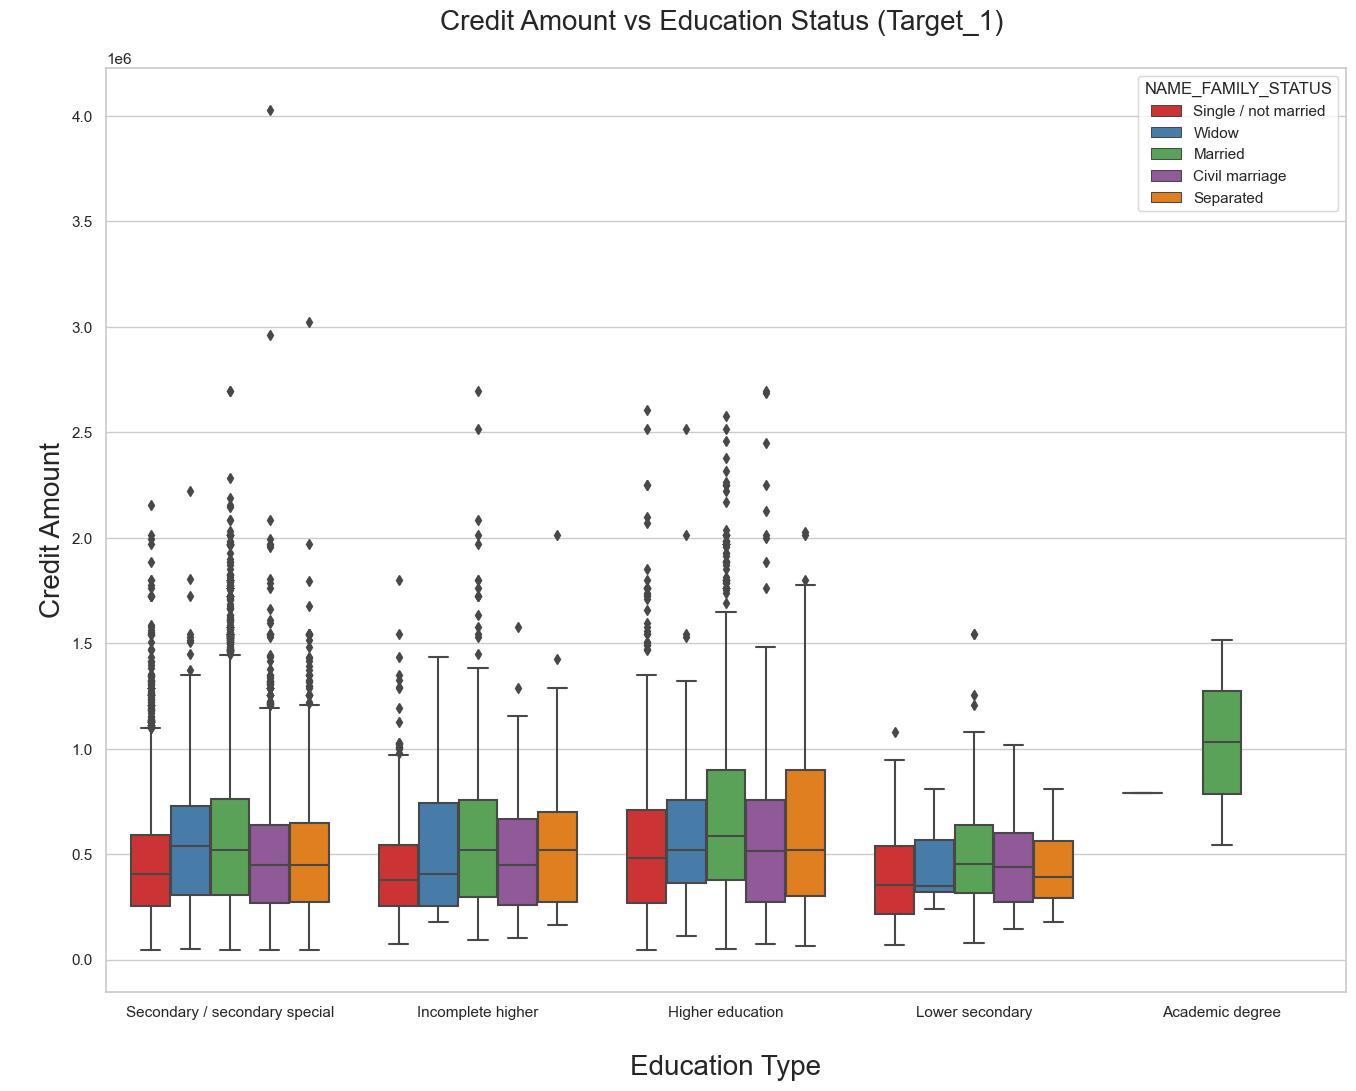

In [73]:
### Box plot for Target_1 of Credit Amount
plt.figure(figsize = [16,12])

sns.boxplot(data= target_1, x= 'NAME_EDUCATION_TYPE', y= 'AMT_CREDIT', hue='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('\nCredit Amount', fontsize=20)
plt.title('Credit Amount vs Education Status (Target_1) \n', fontsize =20)
plt.show()

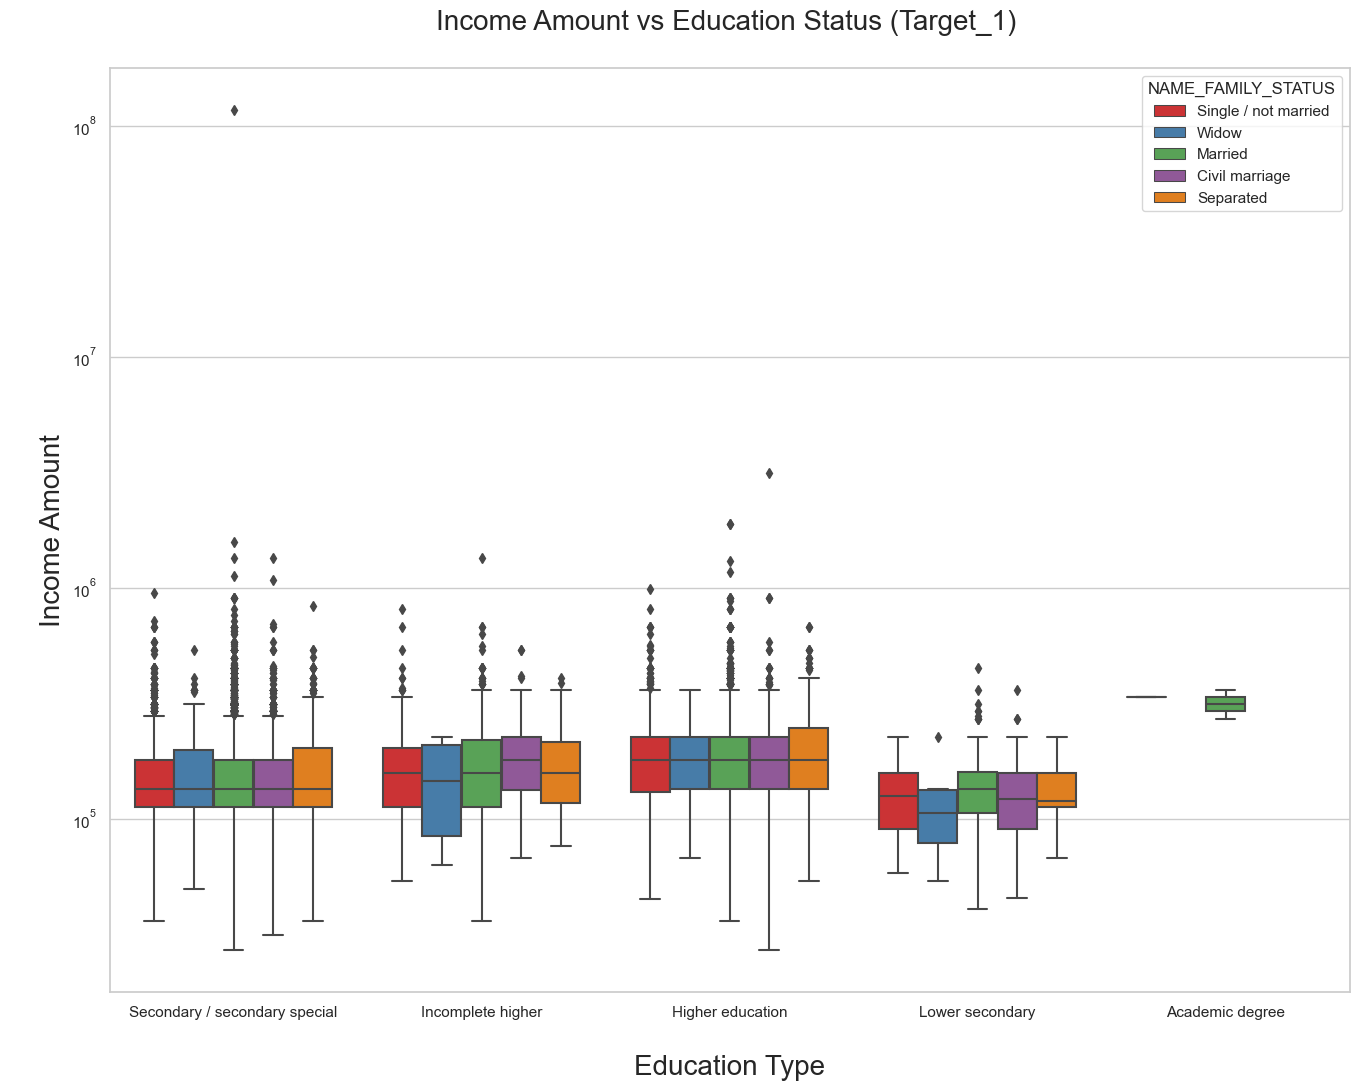

In [74]:
### Box plot for Target_1 of Income Amount
plt.figure(figsize = [16,12])

sns.boxplot(data= target_1, x= 'NAME_EDUCATION_TYPE', y= 'AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.yscale('log')
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('\nIncome Amount', fontsize=20)
plt.title('Income Amount vs Education Status (Target_1) \n', fontsize =20)
plt.show()

# Work on Previous_Application_Dataset

In [75]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [76]:
### Checking the Null values again
round(100*df_prev.isnull().sum()/len(df_prev), 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

In [77]:
### Checking the NAME_CASH_LOAN_PURPOSE
df_prev.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [78]:
### Removing XNA and XAP values
df_prev =  df_prev.drop(df_prev[df_prev.NAME_CASH_LOAN_PURPOSE == 'XNA'].index)
df_prev =  df_prev.drop(df_prev[df_prev.NAME_CASH_LOAN_PURPOSE == 'XAP'].index)

### Merge two Data Sets

In [79]:
### Merging two data sets

loan_merg = pd.merge(left = df_app, right = df_prev, how ='inner', on = 'SK_ID_CURR', suffixes = '_x')
loan_merg.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799,-3015,1.0,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,75000-100000,150000-200000,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266,-3787,2.0,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,5.0,275000-300000,650000-700000,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557,-3557,3.0,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,0,0.0,0.0,0.0,1.0,1.0,350000-375000375000-400000,700000-750000,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,1.0,175000-200000,500000-550000,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,1.0,175000-200000,500000-550000,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [80]:
loan_merg = loan_merg.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                            'WEEKDAY_APPR_PROCESS_START_':'WEEKDAY_APPR_PROCESS_START',
                            'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                            'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                            'WEEKDAY_APPR_PROCESS_STARTX':'WEEKDAY_APPR_PROCESS_START_PREV',
                            'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis =1)

In [82]:
### Removing unwanted columns

loan_merg.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START','HOURS_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
               'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
               'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
               'HOUR_APPR_PROCESS_START_PREV','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace = True)

### Performing Univariate Analysis

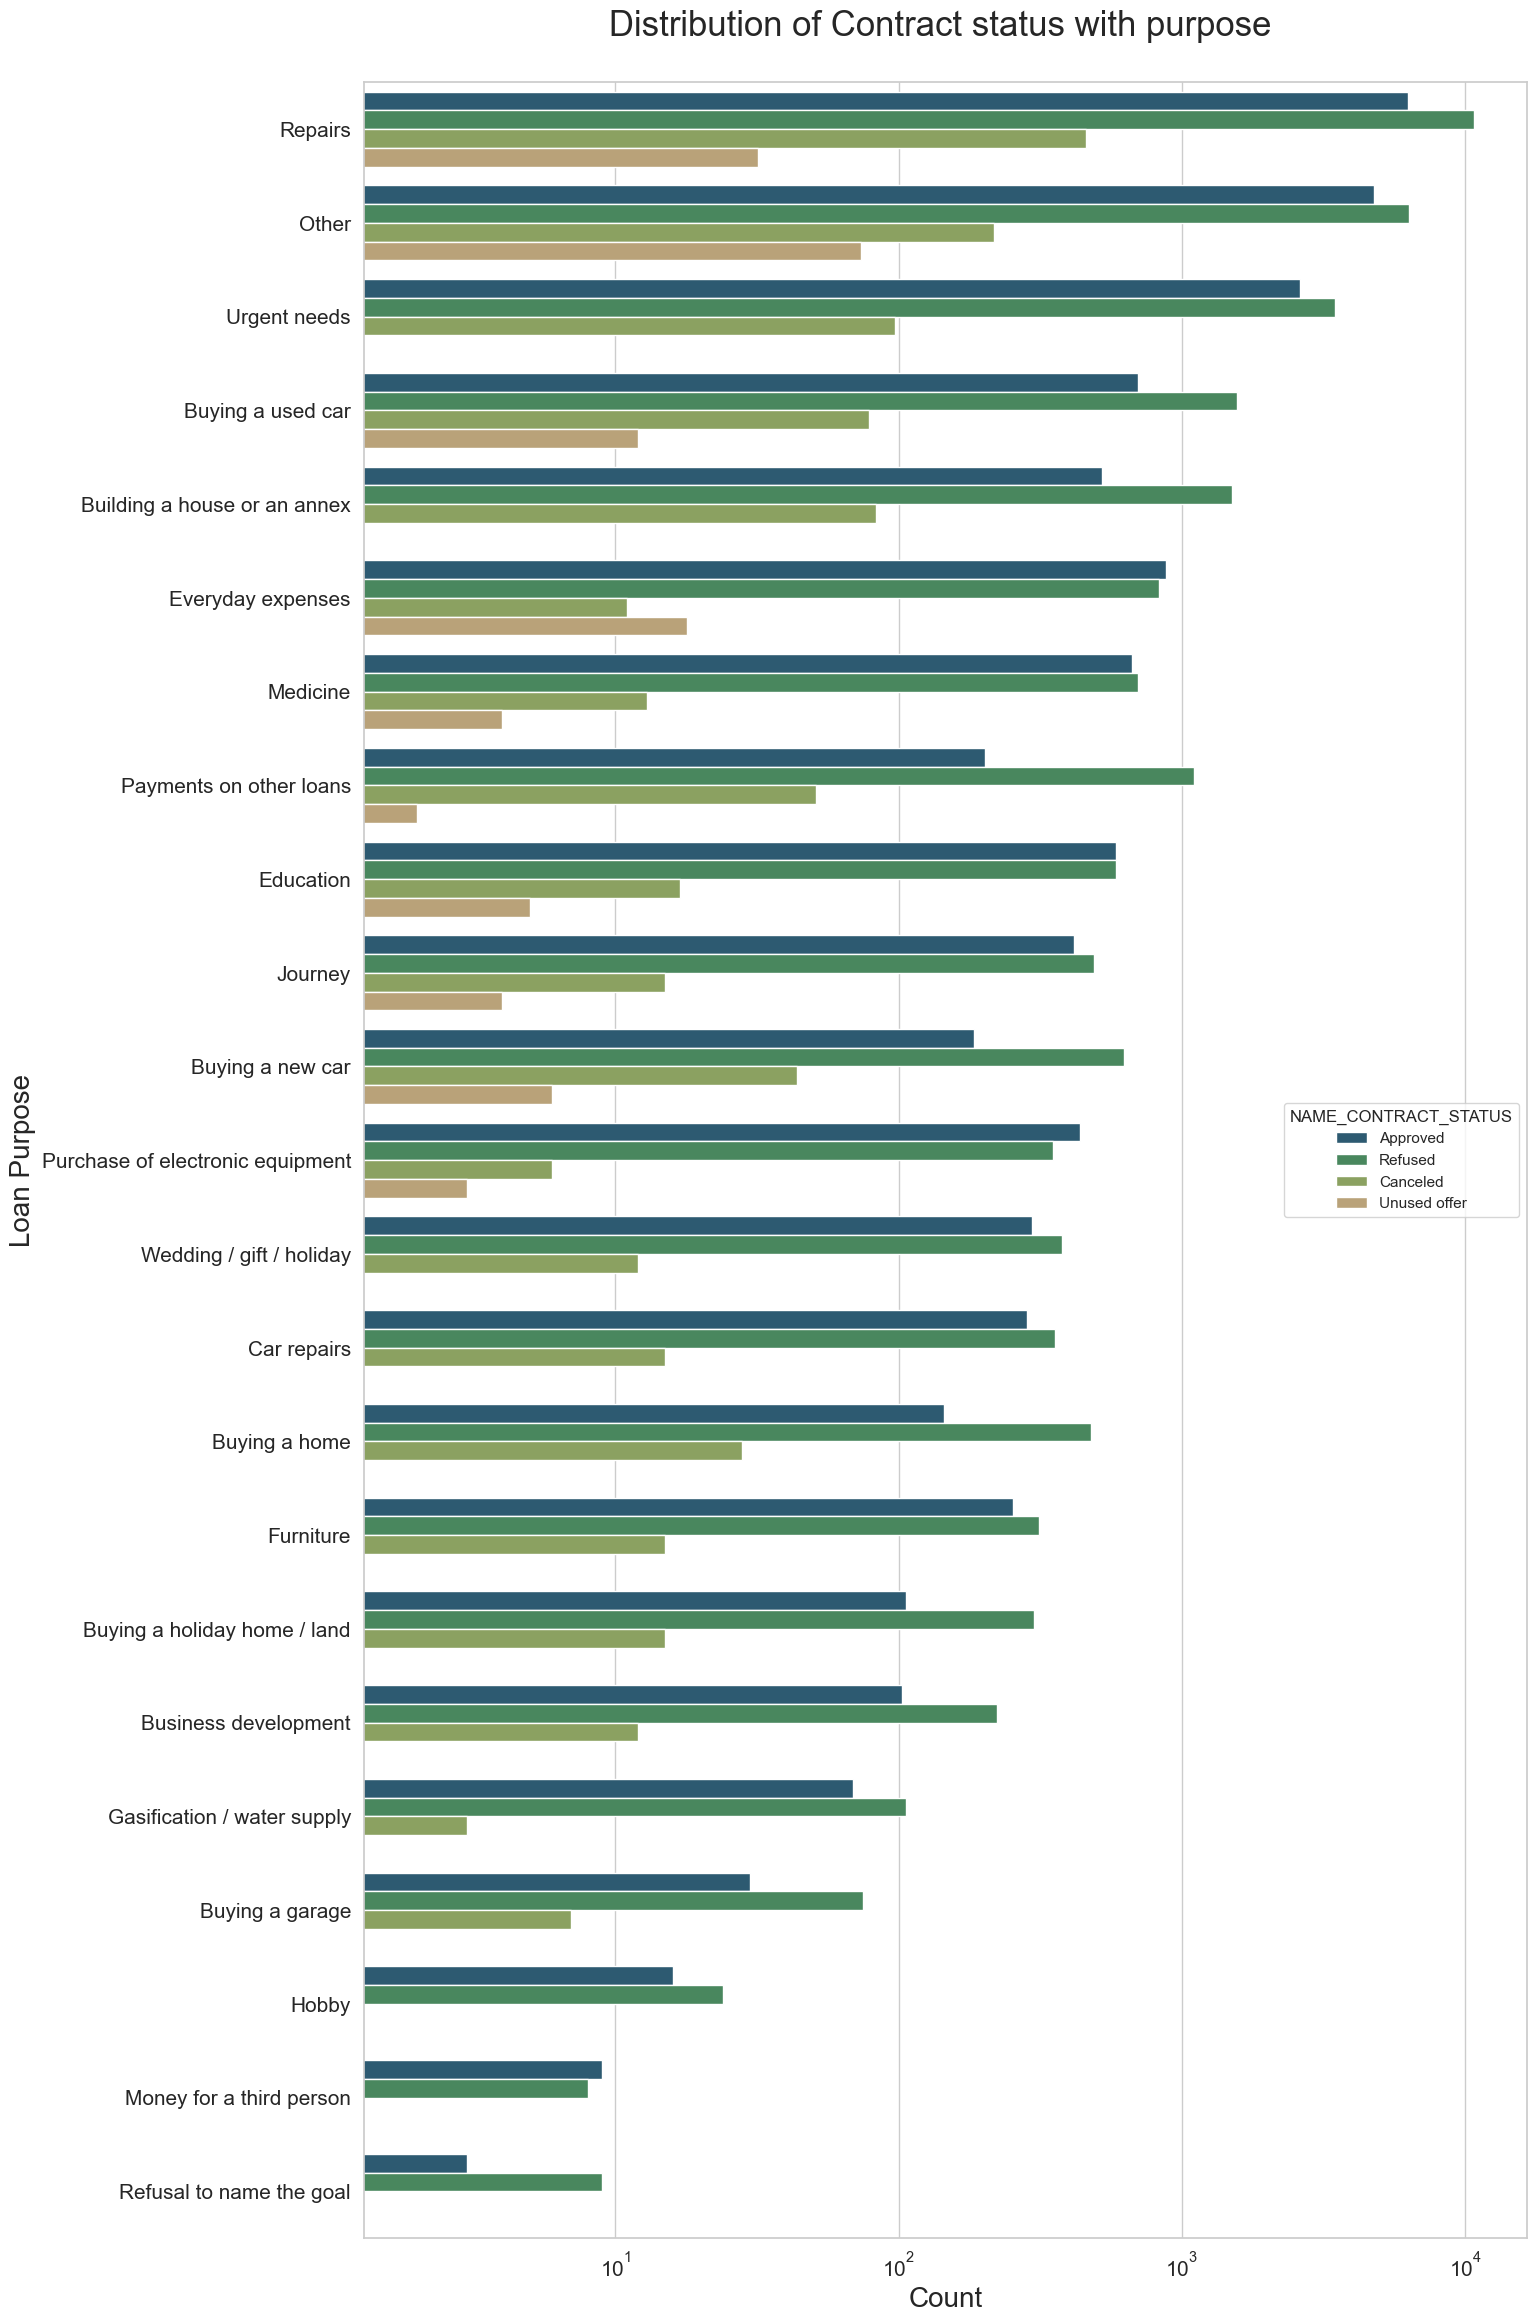

In [83]:
plt.figure(figsize=[15,28])

sns.countplot(data=loan_merg, y='NAME_CASH_LOAN_PURPOSE',
             order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue ='NAME_CONTRACT_STATUS',palette='gist_earth')

plt.title('Distribution of Contract status with purpose \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

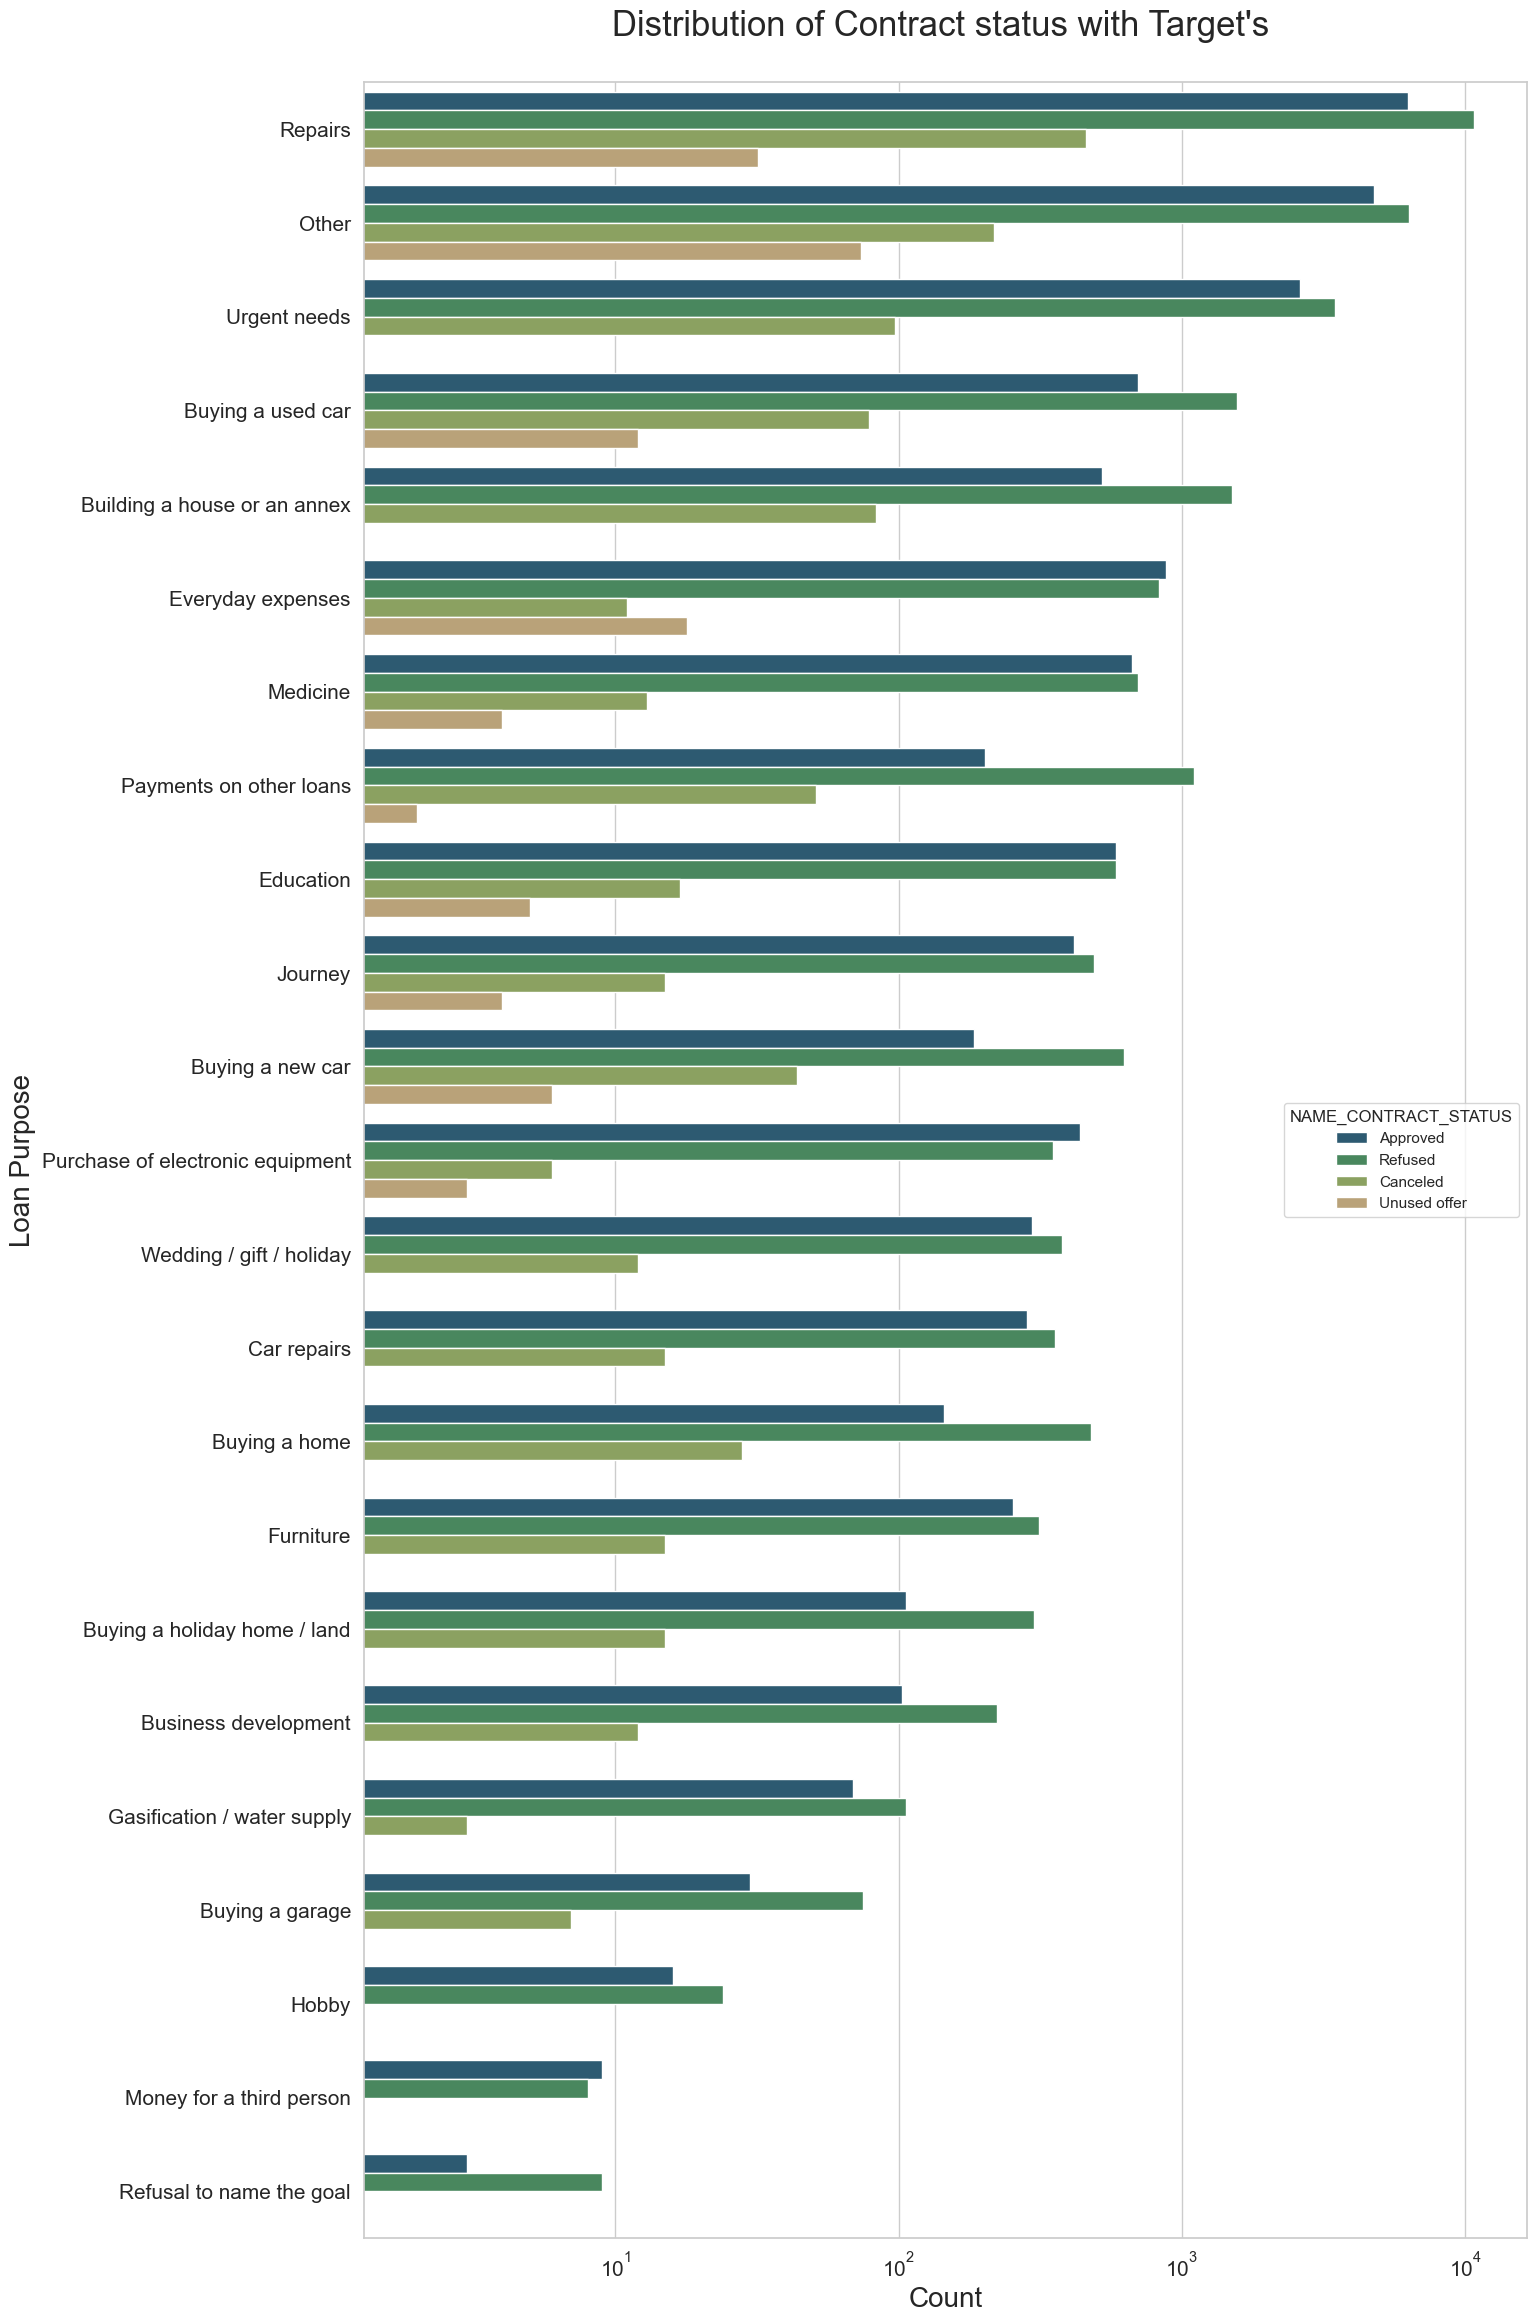

In [84]:
plt.figure(figsize=[15,28])

sns.countplot(data=loan_merg, y='NAME_CASH_LOAN_PURPOSE',
             order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue ='NAME_CONTRACT_STATUS',palette='gist_earth')

plt.title('Distribution of Contract status with Target\'s \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

### Performing Bivariate Analysis

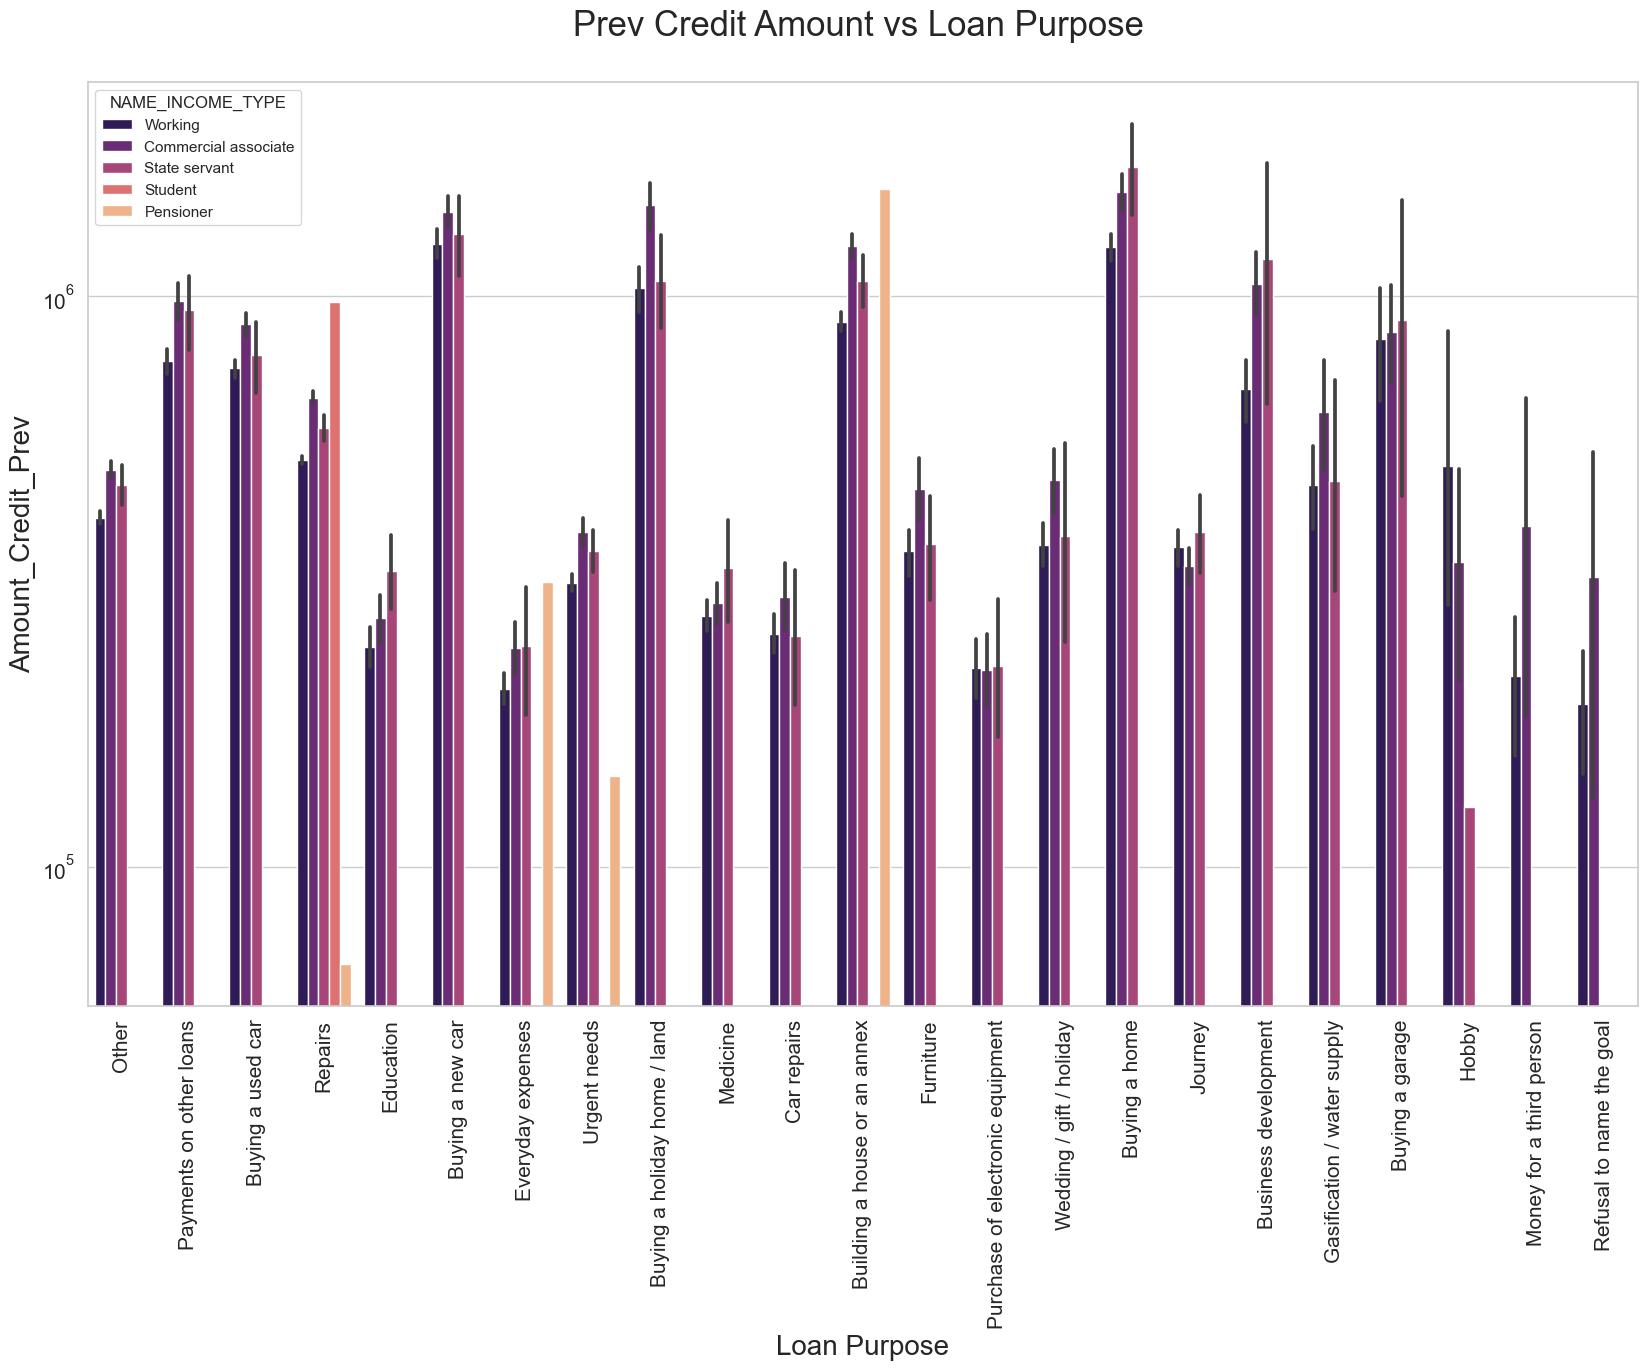

In [85]:
plt.figure(figsize=[20,12])

sns.barplot(data= loan_merg, x= 'NAME_CASH_LOAN_PURPOSE', hue = 'NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v', palette= 'magma')
plt.xticks(rotation=90)
plt.ylabel('Amount_Credit_Prev', fontsize=20)
plt.xlabel('Loan Purpose', fontsize = 20)
plt.yscale('log')
plt.xticks(fontsize =15)
plt.yticks(fontsize = 15)
plt.title('Prev Credit Amount vs Loan Purpose \n', fontsize =25)

plt.show()

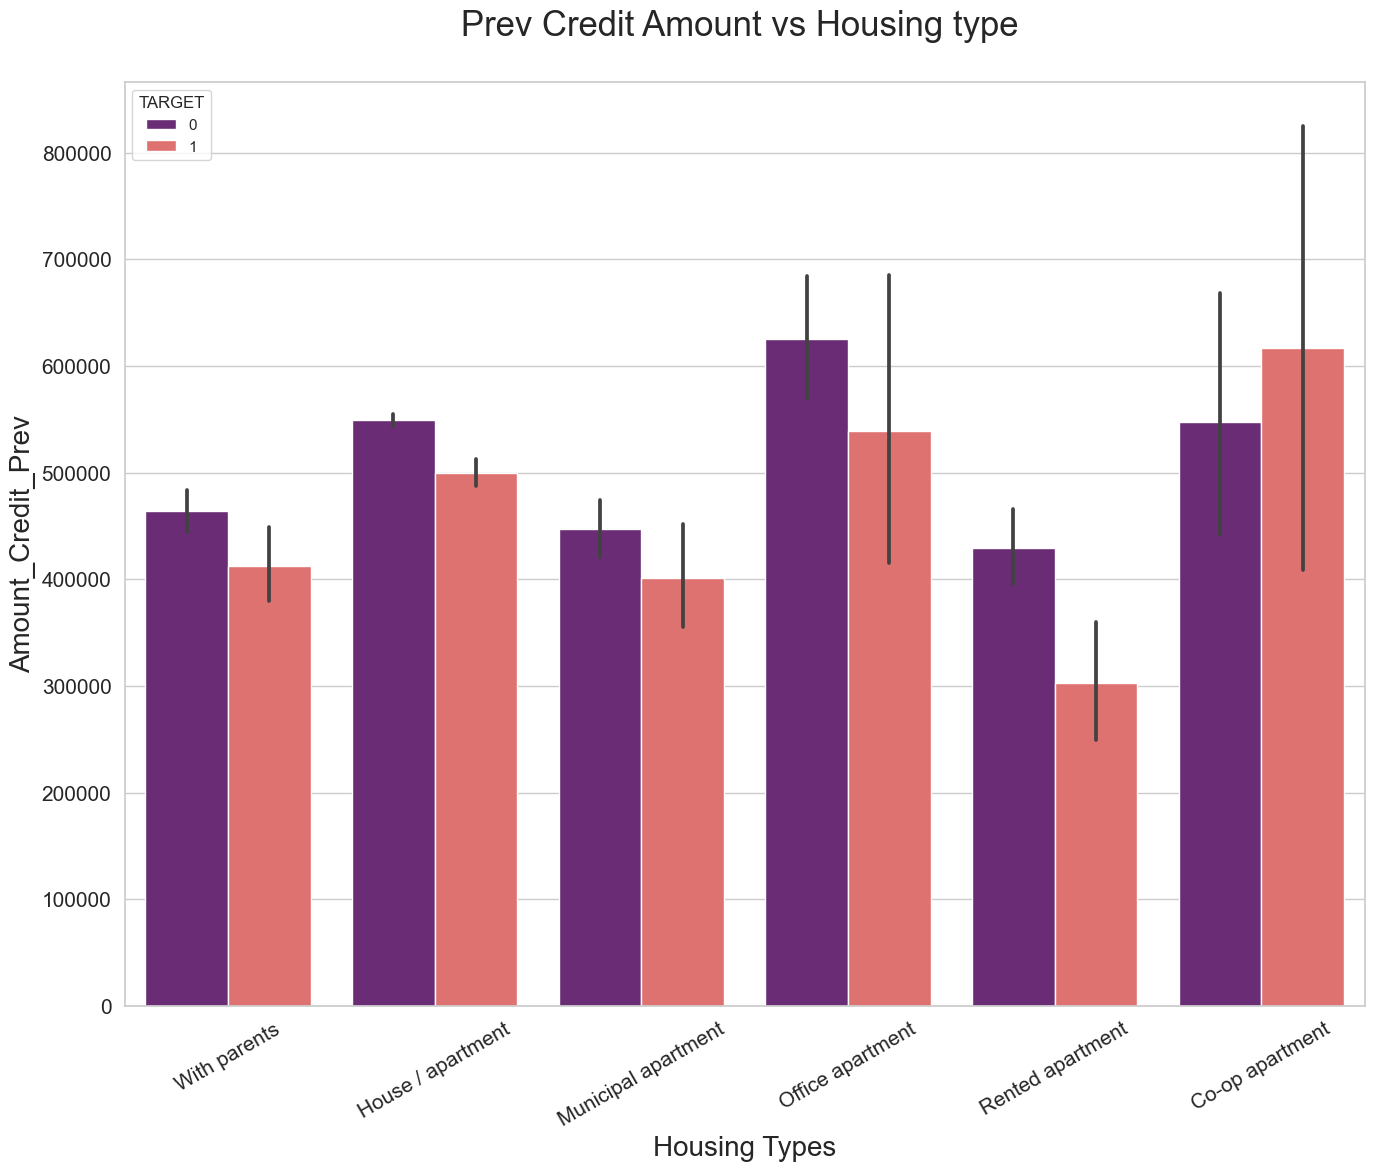

In [86]:
### Credit amount Prev vs Housing Type
plt.figure(figsize=[16,12])

sns.barplot(data= loan_merg, x= 'NAME_HOUSING_TYPE', hue = 'TARGET',y='AMT_CREDIT_PREV', palette= 'magma')
plt.xticks(rotation=30)
plt.ylabel('Amount_Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize = 20)
plt.xticks(fontsize =15)
plt.yticks(fontsize = 15)
plt.title('Prev Credit Amount vs Housing type \n', fontsize =25)

plt.show()